In [1286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tabulate import tabulate
from sklearn.impute import KNNImputer


##  1. Data Scrapping

The data for this project is scraped from the Job Bank of the Canadian Government (jobbank.gc.ca). Initially, all the URLs inside anchor tags were read using Beautiful Soup for jobs filtered by Province and Territories. Subsequently, based on those URLs, the details of each job were extracted using Selenium and saved in CSV format.

In [1287]:
df_on = pd.read_csv('https://raw.githubusercontent.com/sbibek51/Job-Bank-Project/main/data/job_detail_ON_20400_03_29.csv')

In [1288]:
print('Shape of Ontario dataset is:',df_on.shape)

Shape of Ontario dataset is: (20400, 16)


In [1289]:
df_bc = pd.read_csv('https://raw.githubusercontent.com/sbibek51/Job-Bank-Project/main/data/job_detail_BC_14380_03_31.csv')

In [1290]:
print('Shape of British Columbia dataset is:',df_bc.shape)

Shape of British Columbia dataset is: (14380, 16)


In [1291]:
df_ab = pd.read_csv('https://raw.githubusercontent.com/sbibek51/Job-Bank-Project/main/data/job_detail_AB_13993_03_30.csv')

In [1292]:
print('Shape of Alberta dataset is:',df_ab.shape)

Shape of Alberta dataset is: (13993, 16)


In [1293]:
df_qc = pd.read_csv('https://raw.githubusercontent.com/sbibek51/Job-Bank-Project/main/data/job_detail_QC_10805_03_30.csv')

In [1294]:
print('Shape of Quebec dataset is:',df_qc.shape)

Shape of Quebec dataset is: (10805, 16)


In [1431]:
df_other_prov = pd.read_csv('https://raw.githubusercontent.com/sbibek51/Job-Bank-Project/main/data/job_detail_small_provinces_11852_03_31.csv')

In [1296]:
print('Shape of Other Proviences dataset is:',df_other_prov.shape)

Shape of Other Proviences dataset is: (11852, 16)


In [1297]:
# Concatinating dataset from all provinces to form a single dataframe
df = pd.concat([df_on,df_bc,df_ab,df_qc,df_other_prov],ignore_index=True)


## 2. Data Descreption and Wrangling

### 2.1 Understanding the data

In [1298]:
df.shape

(71430, 16)

In [1299]:
df.head(2)

,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,Education,Experience,Responsibilities,Benefits,Valid Through,url
0,prosthetic assistant,"Posted on March 23, 2024",Metro,"Sarnia, ON",NaN,NaN,NaN,Starts as soon as possible,1 vacancy,NaN,NaN,NaN,NaN,NaN,2024-04-21,https://www.jobbank.gc.ca/jobsearch/jobposting...
1,cabinetmaker,"Posted on February 28, 2024",Sympro Mfg Inc.,"Mississauga, ON",27.00 HOUR,30 to 40 hours per week,Permanent employmentFull time,Starts as soon as possible,1 vacancy,English,Secondary (high) school graduation certificate,1 to less than 7 months,"Study plans, specifications or drawings of art...",NaN,2024-04-27,https://www.jobbank.gc.ca/jobsearch/jobposting...


In [1300]:
df.tail(2)

,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,Education,Experience,Responsibilities,Benefits,Valid Through,url
71428,personal support worker - home support,"Posted on February 19, 2024",Co-Care Health Group Inc,"Steinbach, MB",18.00 HOUR,40 hours per week,Permanent employmentFull time,Starts as soon as possible,1 vacancy,English,Secondary (high) school graduation certificate,1 year to less than 2 years,"Administer bedside and personal care, Administ...",NaN,2024-04-13,https://www.jobbank.gc.ca/jobsearch/jobposting...
71429,cook,"Posted on February 28, 2024",Kaapitaarvik Inc.,"Iqaluit, NU",24.00 HOUR,40 hours per week,Permanent employmentFull time,Starts as soon as possible,2 vacancies,English,Secondary (high) school graduation certificate,3 years to less than 5 years,Prepare and cook complete meals or individual ...,NaN,2024-04-28,https://www.jobbank.gc.ca/jobsearch/jobposting...


In [1301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71430 entries, 0 to 71429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             70750 non-null  object
 1   Date Posted       70750 non-null  object
 2   Employer          70750 non-null  object
 3   Location          70750 non-null  object
 4   Salary            57559 non-null  object
 5   Work Hours        43728 non-null  object
 6   Employment Type   66401 non-null  object
 7   Start Date        65359 non-null  object
 8   Vacancies         69324 non-null  object
 9   Languages         40150 non-null  object
 10  Education         40046 non-null  object
 11  Experience        40046 non-null  object
 12  Responsibilities  37734 non-null  object
 13  Benefits          12306 non-null  object
 14  Valid Through     62138 non-null  object
 15  url               71430 non-null  object
dtypes: object(16)
memory usage: 8.7+ MB


In [1302]:
df.isnull().sum()

Title                 680
Date Posted           680
Employer              680
Location              680
Salary              13871
Work Hours          27702
Employment Type      5029
Start Date           6071
Vacancies            2106
Languages           31280
Education           31384
Experience          31384
Responsibilities    33696
Benefits            59124
Valid Through        9292
url                     0
dtype: int64

In [1303]:
df.describe()

,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,Education,Experience,Responsibilities,Benefits,Valid Through,url
count,70750,70750,70750,70750,57559,43728,66401,65359,69324,40150,40046,40046,37734,12306,62138,71430
unique,6771,117,35771,2856,4012,652,176,1,48,4,339,9,23461,3686,174,71383
top,food service supervisor,"Posted on March 26, 2024",NL Health Services,"Edmonton, AB",18.00 HOUR,40 hours per week,Permanent employmentFull time,Starts as soon as possible,1 vacancy,English,Secondary (high) school graduation certificate,1 year to less than 2 years,"Calculate and prepare cheques for payroll, Cal...",Free parking available,2024-04-24,https://www.jobbank.gc.ca/jobsearch/jobposting...
freq,2795,6050,528,4440,3234,13823,49723,65359,49095,37573,18444,13346,485,808,3202,5


### 2.2 Data wrangling

### 2.2.1 Handling inconsistent data

### 2.2.1.1 Duplicates

In [1304]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 39


#### Observation:
There are 39 duplicated rows which might cause issue in EDA and analysis so we are going to drop them

In [1305]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

### 2.2.1.2 Inconsistent

In [1306]:
# Extracting and saving numeric value of Work Hours and their measure scale like : weekly, biweekly etc 

df['Work_hours'] = df['Work Hours'].str.extract(r'^(\d+.*\d+|\d+)')
df['Work_hours_measure'] = df['Work Hours'].str.replace(r'^(\d+.*\d+|\d+)', '', regex=True).str.strip()


In [1307]:
# some of the work hours are in range so calculating average of those range
def handle_ranges(value):
    if isinstance(value, str) and 'to' in value:
        range_values = value.split(' to ')
        lower_bound = float(range_values[0])
        upper_bound = float(range_values[1])
        return (lower_bound + upper_bound) / 2  # Calculating average for range
    else:
        return float(value)  # Keeping single numeric values unchanged

# Apply the function to handle ranges and compute averages
df['Work_hours'] = df['Work_hours'].apply(handle_ranges)

In [1308]:
# creating a column which only stores salary unit in the numeric value form

df['Salary_numeric'] = df['Salary'].str.replace(',', '').str.extract(r'(\d+\.\d+|\d+)').astype(float)
df['Salary_measure'] = df['Salary'].str.extract(r'([A-Za-z]+)$')


In [1309]:
# extracing number of vacancies announced and only storing the numeric count
df['Vacancies'] = pd.to_numeric(df['Vacancies'].str.extract('(\d+)', expand=False), errors='coerce')

In [1310]:
# Remove "Posted on" and convert the remaining part to datetime
df['Date Posted'] = pd.to_datetime(df['Date Posted'].str.replace('Posted on ', ''))

In [1311]:
# converting Valid Through Column to DateTime
df['Valid Through'] = pd.to_datetime(df['Valid Through'])

In [1312]:
# Extracting the province code from the Locataion
province_pattern = r',\s*([A-Z]{2})\s*'
province_abbreviations = df['Location'].str.extract(province_pattern)[0]

# Create a set of unique province abbreviations
unique_province_abbreviations = set(province_abbreviations.dropna())

# Displaying the set
print(unique_province_abbreviations)

{'SK', 'YT', 'PE', 'MB', 'ON', 'UN', 'BC', 'AB', 'NS', 'NL', 'NB', 'NT', 'QC', 'NU'}


In [1313]:
# adding a column Province and Territories in the dataset to make analysis easy based on the provinces
df['Province and Territories'] = province_abbreviations

In [1314]:
# after manually varifying that the province UN obtained by data preprocessing falls in ON Province so updating it
df.loc[df['Province and Territories'] == 'UN', 'Province and Territories'] = 'ON'

In [1315]:
# printing the job counts based on the province and territories
grouped_df = df.groupby('Province and Territories')

print('Job count grouped by Provinces and Territories')
for province, group in grouped_df:
    print(f"{province}: {len(group)}")
 

Job count grouped by Provinces and Territories
AB: 13834
BC: 14296
MB: 2792
NB: 1602
NL: 1377
NS: 1943
NT: 138
NU: 64
ON: 19991
PE: 331
QC: 10800
SK: 3241
YT: 303


### 2.2.2 Handling Missing Values

In [1316]:
# Calculation of null percentage 
null_percentages = (df.isnull().mean() * 100).round(2).astype(str) + '%'

# Filtering out columns with no missing values
null_percentages = null_percentages[null_percentages != '0.0%']

# Sorting null percentages in descending order
null_percentages_sorted = null_percentages.sort_values(ascending=True)

# Creating a list of lists containing column names and null percentages
data = []
for column, percentage in null_percentages_sorted.items():
    data.append([column, percentage])

# Defining column headers
headers = ["Column", "Null Percentage"]

# Print the table using tabulate
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))


╒══════════════════════════╤═══════════════════╕
│ Column                   │ Null Percentage   │
╞══════════════════════════╪═══════════════════╡
│ Title                    │ 0.95%             │
├──────────────────────────┼───────────────────┤
│ Location                 │ 0.95%             │
├──────────────────────────┼───────────────────┤
│ Province and Territories │ 0.95%             │
├──────────────────────────┼───────────────────┤
│ Date Posted              │ 0.95%             │
├──────────────────────────┼───────────────────┤
│ Employer                 │ 0.95%             │
├──────────────────────────┼───────────────────┤
│ Valid Through            │ 13.01%            │
├──────────────────────────┼───────────────────┤
│ Salary                   │ 19.43%            │
├──────────────────────────┼───────────────────┤
│ Salary_numeric           │ 19.43%            │
├──────────────────────────┼───────────────────┤
│ Salary_measure           │ 19.43%            │
├───────────────────

#### Observations:
Some of the columns has null count of around 45% or less which we can drop or impute based on their importance. Column Benefits has more than 83% null values so we are going to drop it. Beside That Job witout Title has all other columns Null so we are going to drop those rows as well.


### 2.2.2.1 Droppoing Null Values

In [1317]:
df.drop(['Benefits'], axis=1,inplace = True)

In [1318]:
# dropping the rows which does not have the main column that is title or salary value
df.dropna(subset=['Title'], inplace=True)
df.dropna(subset=['Salary'], inplace=True)

### 2.2.2.2 Imputing Null Values with mode in suitable columns

In [1319]:
languages_counts = df['Languages'].value_counts()

# Display unique values and their counts
print("Unique values and their counts in the 'Languages' column:")
print(languages_counts)

Unique values and their counts in the 'Languages' column:
English              37511
English or French     1196
French                1007
Bilingual              369
Name: Languages, dtype: int64


In [1320]:
# Imputing Language and Start Date with mode and Employment type and nan Experience with No experience and Not available respectively
df['Start Date'].fillna('Starts as soon as possible', inplace = True)
df['Responsibilities'].fillna('', inplace = True)
df['Employment Type'].fillna('Not available', inplace = True)
df['Languages'].fillna('English', inplace = True)
df['Education'].fillna('Basic level of literacy', inplace = True)
df['Experience'].fillna('No experience', inplace=True)


### 2.2.2.3 KNN Imputer

Null values in Numeric column Work_hours and Vacancies (Number of vacancies) are imputed with help of KNN imputer


In [1321]:

imputer = KNNImputer(n_neighbors=5)
df['Work_hours'] = imputer.fit_transform(df[['Work_hours']])



In [1322]:
df['Vacancies'] = imputer.fit_transform(df[['Vacancies']])

### 2.2.3 Feature Engineering

Now we are going to find some new columns from existing columns which might be more useful for the analysis

In [1323]:
print("Top 5 salaries in the dataset is:")
top_5_salary_rows = df.loc[df['Salary_numeric'].nlargest(5).index]

# Display the top 5 rows
top_5_salary_rows

Top 5 salaries in the dataset is:


,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,Education,Experience,Responsibilities,Valid Through,url,Work_hours,Work_hours_measure,Salary_numeric,Salary_measure,Province and Territories
70787,obstetrician-gynecologist,2024-03-18,SASKATCHEWAN HEALTH AUTHORITY,"Estevan, SK","503,523.88 YEAR",1760 hours per year,Permanent employmentFull time,Starts as soon as possible,1.0,English,"Degree in medicine, dentistry, veterinary medi...",Experience an asset,,2024-04-24,https://www.jobbank.gc.ca/jobsearch/jobposting...,1760.0,hours per year,503523.88,YEAR,SK
35612,psychiatrist,2024-03-14,Pearl Specialist Clinic,"Airdrie, AB","450,000 YEAR",38 to 45 hours per week,Permanent employmentFull time,Starts as soon as possible,2.0,English,"Degree in medicine, dentistry, veterinary medi...",3 years to less than 5 years,"Act as consultants to other physicians, Diagno...",2024-04-13,https://www.jobbank.gc.ca/jobsearch/jobposting...,41.5,hours per week,450000.00,YEAR,AB
63531,psychiatrist,2024-01-29,Saskatchewan Health Authority,"Prince Albert, SK","429,441.28 YEAR",40 hours per week,Permanent employmentFull time,Starts as soon as possible,2.0,English,"Degree in medicine, dentistry, veterinary medi...",7 months to less than 1 year,May conduct medical research on human disorder...,2024-04-17,https://www.jobbank.gc.ca/jobsearch/jobposting...,40.0,hours per week,429441.28,YEAR,SK
64025,child and adolescent psychiatrist,2024-02-22,Saskatchewan Health Authority (Prince Albert),"Prince Albert, SK","429,441 YEAR",1624 hours per year,Permanent employmentFull time,Starts as soon as possible,2.0,English,Earned doctorate degree\n\nor equivalent exper...,7 months to less than 1 year,May conduct medical research on human disorder...,2024-04-03,https://www.jobbank.gc.ca/jobsearch/jobposting...,1624.0,hours per year,429441.00,YEAR,SK
5474,emergency physician,2024-03-07,Peterborough Regional Health Centre,"Peterborough, ON","400,000 YEAR",1950 hours per year,Permanent employmentFull time,Starts as soon as possible,2.0,English,Earned doctorate degree,Experience an asset,,2024-04-06,https://www.jobbank.gc.ca/jobsearch/jobposting...,1950.0,hours per year,400000.00,YEAR,ON


In [1324]:
# handling the various salary measure to compute a common measure of salary
df['Salary_measure'].unique()

array(['HOUR', 'YEAR', 'DAY', 'MONTH', 'WEEKLY', 'BIWEEKLY'], dtype=object)

In [1325]:
df['Work_hours_measure'].unique()

array(['hours per week', nan, 'hours bi-weekly', 'hours per month',
       'hours per year'], dtype=object)

In [1326]:
# Condition to identify rows where Salary_measure is 'HOUR' and Salary_numeric is >= 500
condition = (df['Salary_measure'] == 'HOUR') & (df['Salary_numeric'] >= 500)

# Set Salary_measure to 'YEAR' for rows where the condition is met
df.loc[condition, 'Salary_measure'] = 'YEAR'


In [1327]:
df['Salary'].isnull().sum()

0

In [1328]:
# computing a monthly salary for all the jobs

def monthly_salary_calculator(row):
    Salary_numeric = row['Salary_numeric']
    Salary_measure = row['Salary_measure']
    Work_hours = row['Work_hours']
    Work_hours_measure = row['Work_hours_measure']
    
    if Salary_measure == 'HOUR':
#         if pd.isna(Work_hours) or pd.isna(Work_hours_measure):
            return Salary_numeric * 40 * 4
#         else:
#             return Salary_numeric * Work_hours *4
    elif Salary_measure == 'YEAR':
        return Salary_numeric / 12
    elif Salary_measure == 'DAY':
        return Salary_numeric * 20
    elif Salary_measure == 'MONTH':
        return Salary_numeric
    elif Salary_measure == 'WEEKLY':
        return Salary_numeric * 4
    elif Salary_measure == 'BIWEEKLY':
        return Salary_numeric * 2
    else:
        return None  # Handle undefined cases


In [1329]:
df['Derived_Monthly_Salary'] = df.apply(monthly_salary_calculator, axis=1)


In [1330]:
# calculating number of days each  advertisment is valid for
df['advertisment_validity_duration']  = (df['Valid Through'] - df['Date Posted']).dt.days

In [1331]:
#cross checking for advertisment posted for longer days of validataion
df[df['advertisment_validity_duration']>200][:2]

,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,...,Responsibilities,Valid Through,url,Work_hours,Work_hours_measure,Salary_numeric,Salary_measure,Province and Territories,Derived_Monthly_Salary,advertisment_validity_duration
9802,"Regional Railway Inspector, Infrastructure",2024-03-22,Transport Canada - Surface,"Toronto, ON","95,304 YEAR",NaN,Permanent employmentFull time,Starts as soon as possible,1.0,English,...,,2024-12-31,https://www.jobbank.gc.ca/jobsearch/jobposting...,39.764524,NaN,95304.00,YEAR,ON,7942.0,284.0
25034,information coordinator,2024-03-28,City of Kamloops,"Kamloops, BC",42.62 HOUR,NaN,Permanent employmentFull time,Starts as soon as possible,1.0,English,...,,2025-02-11,https://www.jobbank.gc.ca/jobsearch/jobposting...,39.764524,NaN,42.62,HOUR,BC,6819.2,320.0


In [1332]:
df['Experience'].unique()

array(['1 to less than 7 months', '2 years to less than 3 years',
       '3 years to less than 5 years', '7 months to less than 1 year',
       '1 year to less than 2 years', 'Experience an asset',
       'No experience', 'Will train', '5 years or more'], dtype=object)

In [1333]:
df.isnull().sum()

Title                                 0
Date Posted                           0
Employer                              0
Location                              0
Salary                                0
Work Hours                        13860
Employment Type                       0
Start Date                            0
Vacancies                             0
Languages                             0
Education                             0
Experience                            0
Responsibilities                      0
Valid Through                      7003
url                                   0
Work_hours                            0
Work_hours_measure                13860
Salary_numeric                        0
Salary_measure                        0
Province and Territories              0
Derived_Monthly_Salary                0
advertisment_validity_duration     7003
dtype: int64

In [1334]:
# Grouping the Education Level with corresponding degree
# Replace values containing 'Doctorate' with 'Doctorate Degree' and similarly for other level of education
df.loc[df['Education'].str.contains('Doctorate', case=False), 'Education'] = 'Doctorate Degree'
df.loc[df['Education'].str.contains('Bachelor', case=False), 'Education'] = 'Bachelor Degree'
df.loc[df['Education'].str.contains('Diploma', case=False), 'Education'] = 'Diploma Degree'
df.loc[df['Education'].str.contains('master', case=False), 'Education'] = 'Master Degree'
df.loc[df['Education'].str.contains('CEGEP', case=False), 'Education'] = 'CEGEP'
df.loc[df['Education'].str.contains('medicine', case=False), 'Education'] = 'Medicine/Dentistry Degree'
df.loc[df['Education'].str.contains('Secondary', case=False), 'Education'] = 'Secondary/School Level'
df.loc[df['Education'].str.contains('Apprenticeship', case=False), 'Education'] = 'Vocational Education'

In [1335]:
df['Education'].unique()

array(['Secondary/School Level', 'Diploma Degree', 'CEGEP',
       'Basic level of literacy', 'Bachelor Degree', 'Master Degree',
       'Doctorate Degree', 'Vocational Education',
       'Medicine/Dentistry Degree'], dtype=object)

In [1336]:
# quick look to count of each education level
value_counts = df['Education'].value_counts()
print("Value Counts:",value_counts)

Value Counts: Secondary/School Level       21713
Basic level of literacy      17541
Diploma Degree               12612
Bachelor Degree               2546
CEGEP                         2525
Vocational Education           229
Master Degree                  172
Medicine/Dentistry Degree      118
Doctorate Degree                65
Name: Education, dtype: int64


In [1337]:
# storing corresponding employment type of each job in proper text format
def process_employment_type(entry):
    if isinstance(entry, str):
        # Check if the entry contains the pattern 'Term or contract (ending: date)Type'
        pattern = r'^Term or contract \(ending: \d{4}-\d{2}-\d{2}\)(.*)$'
        match = re.match(pattern, entry)
        
        if match:
            # Extract the employment type from the matched group
            employment_type = match.group(1).strip()
            
            # Remove any content inside parentheses
            employment_type = re.sub(r'\(.*\)', '', employment_type).strip()
            
            return f'Term of Contract {employment_type}'
        else:
            return entry
    else:
        return entry

# Apply the function to the 'Employment Type' column
df['Employment Type'] = df['Employment Type'].apply(process_employment_type)


In [1338]:
df.loc[df['Employment Type'].str.contains('Part', case=False), 'Employment Type'] = 'Part Time'
df.loc[df['Employment Type'].str.contains('Permanent', case=False), 'Employment Type'] = 'Permanent Full Time'
df.loc[df['Employment Type'].str.contains('contract', case=False), 'Employment Type'] = 'Term or contract'
df.loc[df['Employment Type'].str.contains('Seasonal', case=False), 'Employment Type'] = 'Seasonal'
df.loc[df['Employment Type'].str.contains('casual', case=False), 'Employment Type'] = 'Seasonal'

In [1339]:
df['Employment Type'].unique()

array(['Permanent Full Time', 'Term or contract', 'Full time',
       'Part Time', 'Not available', 'Seasonal'], dtype=object)

In [1340]:
# checking how many unique job title we have in the dataset
print('Unique values of Job Title is:',len(pd.unique(df['Title'])))

Unique values of Job Title is: 6354


#### Observation:
Number of Unique Job title is very large number so we have to group them based on corresponding job field of each job

In [1341]:
# Concatenate 'Title' and 'Responsibilities' columns
df['Title_and_Responsibilities_Text'] = df['Title'] + ' ' + df['Responsibilities']

In [1342]:
df['Title_and_Responsibilities_Text'].head(2)

1    cabinetmaker Study plans, specifications or dr...
2    restoration carpenter Read and interpret bluep...
Name: Title_and_Responsibilities_Text, dtype: object

In [1343]:
# Deriving a job industry from Title and Responsibilities using the Topic Modeling

#### 2.2.3.1 Topic Modelling

In [1344]:
'''from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Function to perform text preprocessing
def preprocess_text(text):
    if isinstance(text, float):
        return ''
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(tokens)



# Pipeline for text preprocessing and topic modeling
pipeline = Pipeline([
    ('text_preprocessing', FunctionTransformer(lambda x: x['Title_and_Responsibilities_Text'].apply(preprocess_text))),
    ('vectorizer', CountVectorizer(max_df=0.95, min_df=2, max_features=1000)),
    ('topic_modeling', LatentDirichletAllocation(n_components=10, random_state=42))
])




# Fit pipeline to the concatenated text
pipeline.fit(df)

# Get the top words for each topic
vectorizer = pipeline.named_steps['vectorizer']
feature_names = vectorizer.get_feature_names_out()

topic_modeling = pipeline.named_steps['topic_modeling']
top_words_per_topic = []

for topic_idx, topic in enumerate(topic_modeling.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, words in enumerate(top_words_per_topic):
    print(f'Topic {i}: {" ".join(words)}')
    
    '''

'from sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.decomposition import LatentDirichletAllocation\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import FunctionTransformer\nfrom nltk.tokenize import word_tokenize\nfrom nltk.corpus import stopwords\nimport string\n\n# Function to perform text preprocessing\ndef preprocess_text(text):\n    if isinstance(text, float):\n        return \'\'\n    stop_words = set(stopwords.words(\'english\'))\n    tokens = word_tokenize(text.lower())\n    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]\n    return \' \'.join(tokens)\n\n\n\n# Pipeline for text preprocessing and topic modeling\npipeline = Pipeline([\n    (\'text_preprocessing\', FunctionTransformer(lambda x: x[\'Title_and_Responsibilities_Text\'].apply(preprocess_text))),\n    (\'vectorizer\', CountVectorizer(max_df=0.95, min_df=2, max_features=1000)),\n    (\'topic_modeling\', LatentDirichletAllocation

In [1345]:
# Define the top words for each topic

top_words_per_topic = [
    ['clients', 'software', 'patients', 'develop', 'organization', 'programs', 'systems', 'policies', 'care'],
    ['maintain', 'prepare', 'information', 'telephone', 'financial', 'answer', 'office', 'electronic', 'assistant', 'service'],
    ['install', 'equipment', 'cut', 'using', 'materials', 'repair', 'products', 'operate', 'specifications', 'metal'],
    ['clean', 'food', 'wash', 'items', 'kitchen', 'customers', 'areas', 'tables', 'storage', 'appliances'],
    ['food', 'staff', 'service', 'prepare', 'schedules', 'supervise', 'work', 'establish', 'meet', 'ensure'],
    ['procedures', 'plan', 'administrative', 'office', 'children', 'evaluate', 'co', 'staff', 'ordinate', 'data'],
    ['sales', 'merchandise', 'customer', 'workers', 'supervise', 'retail', 'staff', 'inventory', 'maintain', 'resolve'],
    ['materials', 'construction', 'concrete', 'clean', 'assist', 'unload', 'load', 'sites', 'transport', 'asphalt'],
    ['food', 'cook', 'kitchen', 'supplies', 'prepare', 'equipment', 'areas', 'staff', 'dishes', 'service'],
    ['work', 'children', 'equipment', 'activities', 'repair', 'prepare', 'duties', 'co', 'ordinate', 'perform']
]

# Define industry topics
industry_topics = {
    0: 'Healthcare/Technical Software Solutions',
    1: 'Administrative Services',
    2: 'Industrial Equipment Services',
    3: 'Hospitality and Cleaning Services',
    4: 'Food Service Management',
    5: 'Childcare and Administrative Services',
    6: 'Retail Management',
    7: 'Construction and Materials Handling',
    8: 'Culinary Services',
    9: 'Childcare and Activities Coordination'
}

# Create a new column to store inferred industry topics
df['Job_Field'] = ''

# Function to assign industry topic based on top words
def assign_topic(row):
    text = row['Title_and_Responsibilities_Text']
    for topic, keywords in enumerate(top_words_per_topic):
        if any(keyword in text for keyword in keywords):
            return industry_topics[topic]
    return 'Unknown'

# Apply the function to assign industry topics
df['Job_Field'] = df.apply(assign_topic, axis=1)




In [1346]:
# Display the DataFrame with the inferred industry topics
df[['Title_and_Responsibilities_Text', 'Job_Field']][10:20]

,Title_and_Responsibilities_Text,Job_Field
12,"farm supervisor Cut horticultural crops, Delea...",Industrial Equipment Services
13,retail store supervisor Supervise staff (appre...,Administrative Services
16,"bar manager Plan, organize, direct, control an...",Administrative Services
18,food service supervisor Establish methods to m...,Administrative Services
19,plumber helper Erect and dismantle concrete fo...,Industrial Equipment Services
20,truck driver-supervisor Prepare production and...,Industrial Equipment Services
21,administrative assistant,Administrative Services
24,personal support worker - home support Adminis...,Healthcare/Technical Software Solutions
26,administrative officer Review and evaluate new...,Healthcare/Technical Software Solutions
27,Managers in customer and personal services,Administrative Services


In [1347]:
df.loc[df['Job_Field'].str.contains('Unknown', case=False), 'Job_Field'] = 'Logistics and Transportation'


In [1348]:
df['Job_Field'].value_counts()

Administrative Services                    17067
Healthcare/Technical Software Solutions    15217
Logistics and Transportation               10065
Industrial Equipment Services               7436
Childcare and Administrative Services       3204
Hospitality and Cleaning Services           2595
Retail Management                            945
Food Service Management                      894
Construction and Materials Handling           89
Childcare and Activities Coordination          8
Culinary Services                              1
Name: Job_Field, dtype: int64

In [1349]:
# manual inspection and update some job field
'''filtered_df = df[df['Title_and_Responsibilities_Text'].str.contains('cook|chef', case=False)]
filtered_df ''' 

'''filtered_df = df[df['Title_and_Responsibilities_Text'].str.contains('software|engineer | nurse', case=False)]
filtered_df '''

'''filtered_df = df[df['Title_and_Responsibilities_Text'].str.contains('construction', case=False)]
filtered_df '''

'''filtered_df = df[df['Title_and_Responsibilities_Text'].str.contains('child care', case=False)]
filtered_df '''

'''filtered_df = df[df['Title_and_Responsibilities_Text'].str.contains('driver', case=False)]
filtered_df '''

'''filtered_df = df[df['Title'].str.contains('food service supervisor', case=False)]
filtered_df '''

"""filtered_df = df[df['Job_Field'].str.contains('Childcare and Activities Coordination', case=False)]
filtered_df """

"filtered_df = df[df['Job_Field'].str.contains('Childcare and Activities Coordination', case=False)]\nfiltered_df "

In [1350]:
# manual inspection and updating some job field based on title of the job
df.loc[df['Title_and_Responsibilities_Text'].str.contains('software|engineer', case=False), 'Job_Field'] = 'Healthcare/Technical Software Solutions'
df.loc[df['Title_and_Responsibilities_Text'].str.contains('cook|chef', case=False), 'Job_Field'] = 'Culinary Services'
df.loc[df['Title_and_Responsibilities_Text'].str.contains('construction', case=False), 'Job_Field'] = 'Construction and Materials Handling'
df.loc[df['Title_and_Responsibilities_Text'].str.contains('child care', case=False), 'Job_Field'] = 'Childcare and Administrative Services'
df.loc[df['Title_and_Responsibilities_Text'].str.contains('driver', case=False), 'Job_Field'] = 'Logistics and Transportation'
df.loc[df['Title'].str.contains('food service supervisor', case=False), 'Job_Field'] = 'Food Service Management'
df.loc[df['Job_Field'].str.contains('Childcare and Activities Coordination', case=False), 'Job_Field'] = 'Childcare and Administrative Services'

In [1351]:
df['Job_Field'].value_counts()

Healthcare/Technical Software Solutions    13758
Logistics and Transportation               10909
Administrative Services                    10586
Culinary Services                           5074
Industrial Equipment Services               4945
Food Service Management                     3626
Construction and Materials Handling         2658
Childcare and Administrative Services       2635
Hospitality and Cleaning Services           2385
Retail Management                            945
Name: Job_Field, dtype: int64

In [1352]:
# droping these two columns because two other columns Work_hours and advertisement_validity duration is created already
df.drop(columns=['Work Hours','Valid Through'], inplace=True)

In [1353]:
df['Work_hours_measure'].fillna('hours per week',inplace=True )

In [1354]:
# imputing some missing advertisment_validity_duration
df['advertisment_validity_duration'] = imputer.fit_transform(df[['advertisment_validity_duration']])

In [1355]:
# checking nulls again
df.isnull().sum()

Title                              0
Date Posted                        0
Employer                           0
Location                           0
Salary                             0
Employment Type                    0
Start Date                         0
Vacancies                          0
Languages                          0
Education                          0
Experience                         0
Responsibilities                   0
url                                0
Work_hours                         0
Work_hours_measure                 0
Salary_numeric                     0
Salary_measure                     0
Province and Territories           0
Derived_Monthly_Salary             0
advertisment_validity_duration     0
Title_and_Responsibilities_Text    0
Job_Field                          0
dtype: int64

In [1356]:
# checking info of cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57521 entries, 1 to 71429
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Title                            57521 non-null  object        
 1   Date Posted                      57521 non-null  datetime64[ns]
 2   Employer                         57521 non-null  object        
 3   Location                         57521 non-null  object        
 4   Salary                           57521 non-null  object        
 5   Employment Type                  57521 non-null  object        
 6   Start Date                       57521 non-null  object        
 7   Vacancies                        57521 non-null  float64       
 8   Languages                        57521 non-null  object        
 9   Education                        57521 non-null  object        
 10  Experience                       57521 non-null  object   

In [1357]:
#splitting into numeric and categorical dataframe
numeric_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(exclude=np.number).columns

In [1358]:

print('Numeric Columns:')
numeric_columns



Numeric Columns:


Index(['Vacancies', 'Work_hours', 'Salary_numeric', 'Derived_Monthly_Salary',
       'advertisment_validity_duration'],
      dtype='object')

In [1359]:
print('Categorical Columns:')
categorical_columns

Categorical Columns:


Index(['Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Languages', 'Education', 'Experience',
       'Responsibilities', 'url', 'Work_hours_measure', 'Salary_measure',
       'Province and Territories', 'Title_and_Responsibilities_Text',
       'Job_Field'],
      dtype='object')

# Step 3: Exploratory Data Analysis (EDA)

## 3.1 Summary Statistics

In [1360]:
# Calculate summary statistics
summary_stats = df.describe()
# Transpose for better readability
summary_stats_df = summary_stats.T

# Print the summary statistics table
print(tabulate(summary_stats_df, headers='keys', tablefmt='fancy_grid'))


╒════════════════════════════════╤═════════╤════════════╤═════════════╤══════════╤═══════╤═══════════╤═══════════╤════════╕
│                                │   count │       mean │         std │      min │   25% │       50% │       75% │    max │
╞════════════════════════════════╪═════════╪════════════╪═════════════╪══════════╪═══════╪═══════════╪═══════════╪════════╡
│ Vacancies                      │   57521 │    1.97603 │     3.56472 │  1       │     1 │    1      │    2      │    300 │
├────────────────────────────────┼─────────┼────────────┼─────────────┼──────────┼───────┼───────────┼───────────┼────────┤
│ Work_hours                     │   57521 │   39.7645  │    62.7576  │  1       │    35 │   39.7645 │   40      │   2190 │
├────────────────────────────────┼─────────┼────────────┼─────────────┼──────────┼───────┼───────────┼───────────┼────────┤
│ Salary_numeric                 │   57521 │ 6523.46    │ 23449.8     │ 12.2     │    18 │   23      │   29      │ 503524 │
├───────

## 3.2 Custom Data Encoding method based on scenarios 

In [1361]:
# Ordinal encoding to handle the categorical values of experience

from sklearn.preprocessing import OrdinalEncoder


experience_order = ['No experience', 'Will train', 'Experience an asset', 
                    '1 to less than 7 months', '7 months to less than 1 year', 
                    '1 year to less than 2 years', '2 years to less than 3 years', 
                    '3 years to less than 5 years', '5 years or more']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[experience_order])

# Fit and transform the 'Experience' column
df['Experience_encoded'] = ordinal_encoder.fit_transform(df[['Experience']])

In [1362]:
df[['Experience','Experience_encoded']][:10]

,Experience,Experience_encoded
1,1 to less than 7 months,3.0
2,2 years to less than 3 years,6.0
3,3 years to less than 5 years,7.0
5,7 months to less than 1 year,4.0
6,7 months to less than 1 year,4.0
7,7 months to less than 1 year,4.0
8,1 year to less than 2 years,5.0
9,1 year to less than 2 years,5.0
10,1 to less than 7 months,3.0
11,1 year to less than 2 years,5.0


In [1363]:
## Ed=ncoding for education level
# Define a dictionary mapping each education level to its corresponding value
education_mapping = {
    
    'Basic level of literacy': 1,
    'Vocational Education': 2,
    'Secondary/School Level': 3,
    'CEGEP': 4,
    'Diploma Degree': 5,
    'Bachelor Degree': 6, 
    'Master Degree': 7,
    'Medicine/Dentistry Degree': 8,
    'Doctorate Degree': 9
}

# Apply the mapping to the 'Education' column
df['Education_Encoded'] = df['Education'].map(education_mapping)

# Display the encoded values


In [1364]:
df[['Education', 'Education_Encoded']]


,Education,Education_Encoded
1,Secondary/School Level,3
2,Secondary/School Level,3
3,Diploma Degree,5
5,Diploma Degree,5
6,Secondary/School Level,3
...,...,...
71425,Secondary/School Level,3
71426,Diploma Degree,5
71427,Bachelor Degree,6
71428,Secondary/School Level,3


In [1365]:
job_field_mapping = {
    
    'Healthcare/Technical Software Solutions':10,
    'Childcare and Administrative Services':9,
    'Construction and Materials Handling':8,
    'Logistics and Transportation':7,  
    'Administrative Services':6,
    'Industrial Equipment Services':5,
    'Retail Management':4,
    'Food Service Management':3,
    'Culinary Services':2,
    'Hospitality and Cleaning Services':1,
      
    
}
# Apply the mapping to the 'Education' column
df['Job_Field_Encoded'] = df['Job_Field'].map(job_field_mapping)

In [1366]:
job_type_mapping = {
    
    
    'Permanent Full Time': 6,
     'Full time': 5,
    'Term or contract': 4,
    'Part Time': 3,
    'Seasonal': 2 , 
    'Not available': 1,
}

# Apply the mapping to the 'Education' column
df['Employment_Type_Encoded'] = df['Employment Type'].map(job_type_mapping)

In [1367]:
df['Employment_Type_Encoded'].unique()

array([6, 4, 5, 3, 1, 2], dtype=int64)

## 3.2.1 One Hot Encoding

Provinces and Territories are encoded using One Hot Encoding before model building in upcoming step.

## 3.3 Distribution of Numeric Variables

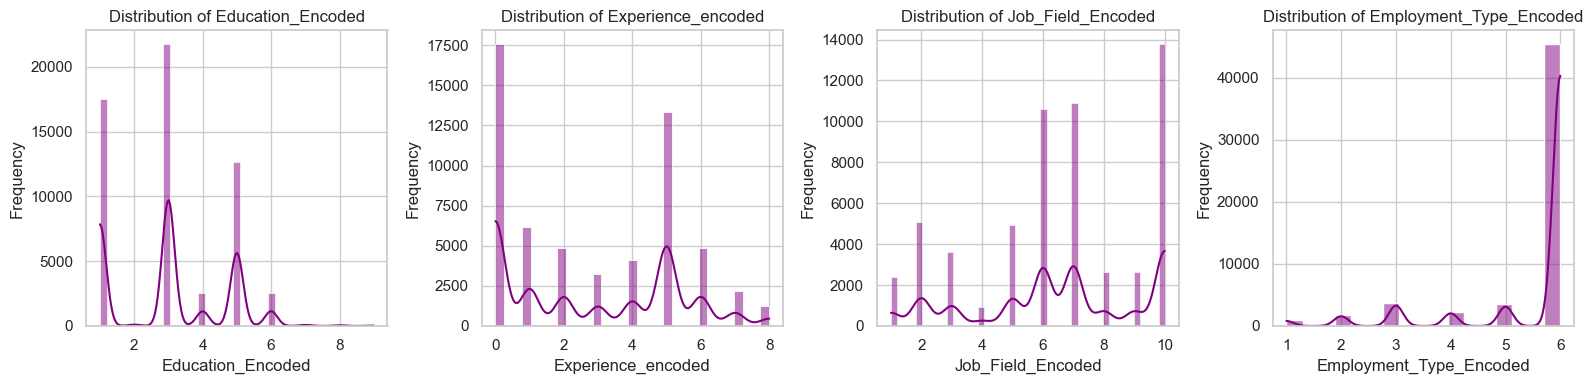

In [1368]:
# plotting the distribution of numeric variables

numeric_columns_plot = ['Education_Encoded','Experience_encoded','Job_Field_Encoded','Employment_Type_Encoded']
num_plots = len(numeric_columns_plot)
# Limit the number of columns per row to 5
num_cols = min(5, num_plots)

num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

# Flatten axes if needed
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_cols == 1:
    axes = axes.reshape(-1, 1)

# Iterate through numeric columns and plot each one
for i, col in enumerate(numeric_columns_plot):
    row = i // num_cols
    col_idx = i % num_cols

    ax = axes[row, col_idx]

    sns.histplot(df[col], kde=True, ax=ax, color='purple')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove empty plots if exists
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        row = i // num_cols
        col_idx = i % num_cols
        axes[row, col_idx].remove()

plt.tight_layout()
plt.show()


## 3.4 Univaritae Analysis

### 3.4.1 Bar Chart

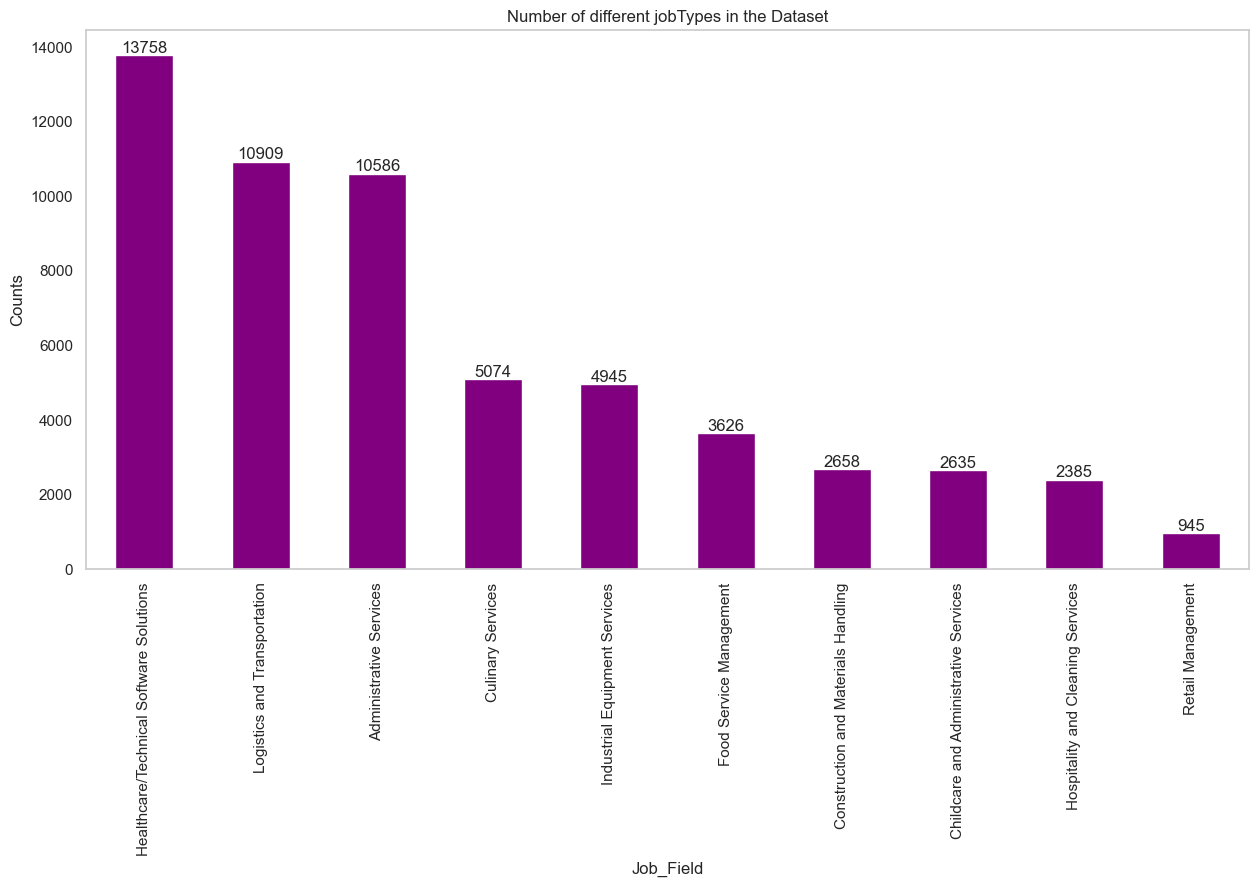

In [1369]:
# creating a bar chart 

plt.figure(figsize=(15, 7))

# Sort the data in descending order
sorted_df = df.groupby('Job_Field')['Derived_Monthly_Salary'].count().sort_values(ascending=False)

# Plot the bar chart with reversed order
ax = sorted_df.plot(kind='bar', color='purple')

# Set title and labels
plt.title('Number of different jobTypes in the Dataset')
plt.ylabel('Counts')

# Remove background grid
ax.grid(False)

# Add annotations above each bar
for i, v in enumerate(sorted_df):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


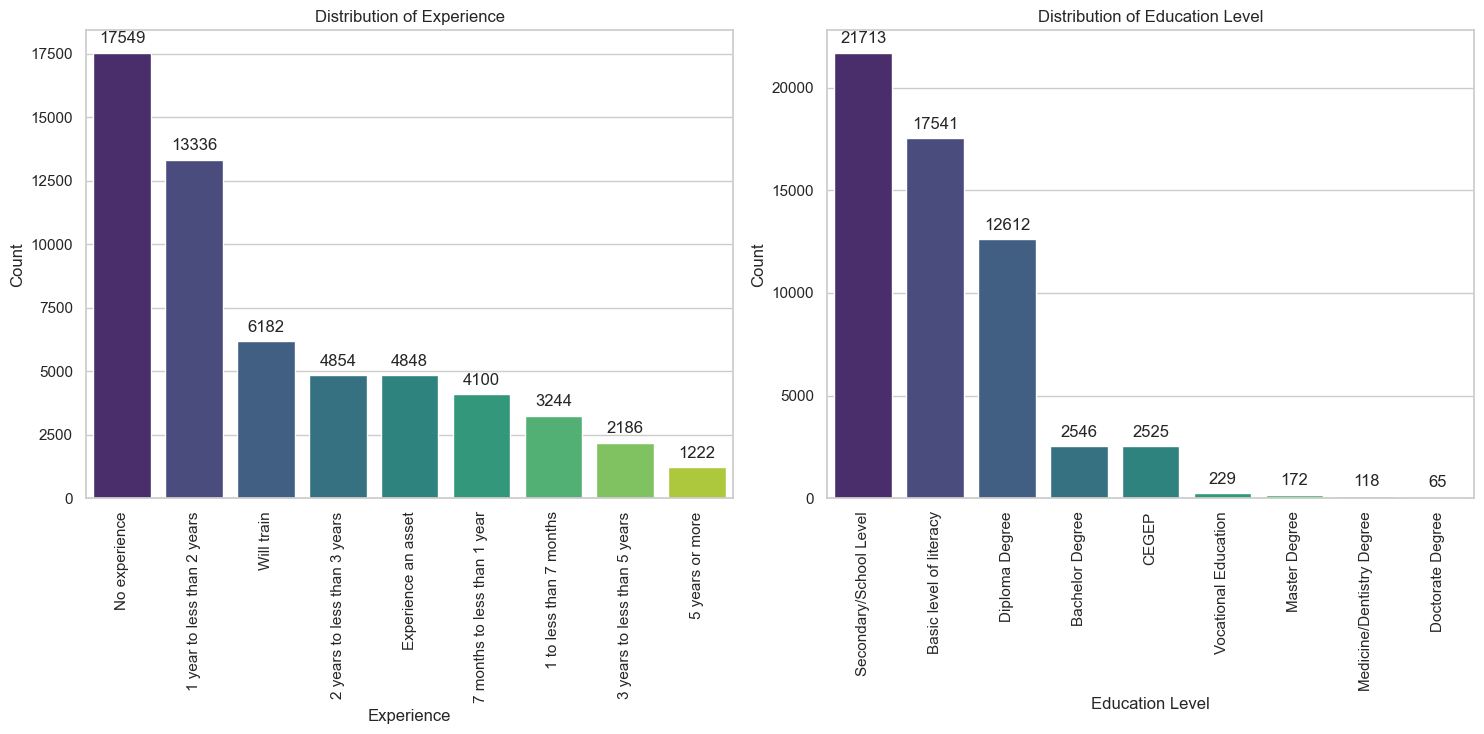

In [1370]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7.5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Experience', data=df, ax=ax[0], order=df['Experience'].value_counts().index, palette='viridis')
# Annotate bars with counts
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education', data=df, ax=ax[1], order=df['Education'].value_counts().index, palette='viridis')
# Annotate bars with counts
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rotate x-axis labels for both subplots
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)  # Rotate to strict vertical
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)  # Rotate to strict vertical

# Add labels and titles for the subplots
ax[0].set_xlabel('Experience')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Experience')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()


#### Observation:
Most of the job posted has requirement of no prior experience and also most job demands for only secondary level of education which means those posted jobs are mostly of common category rather than high skill jobs.

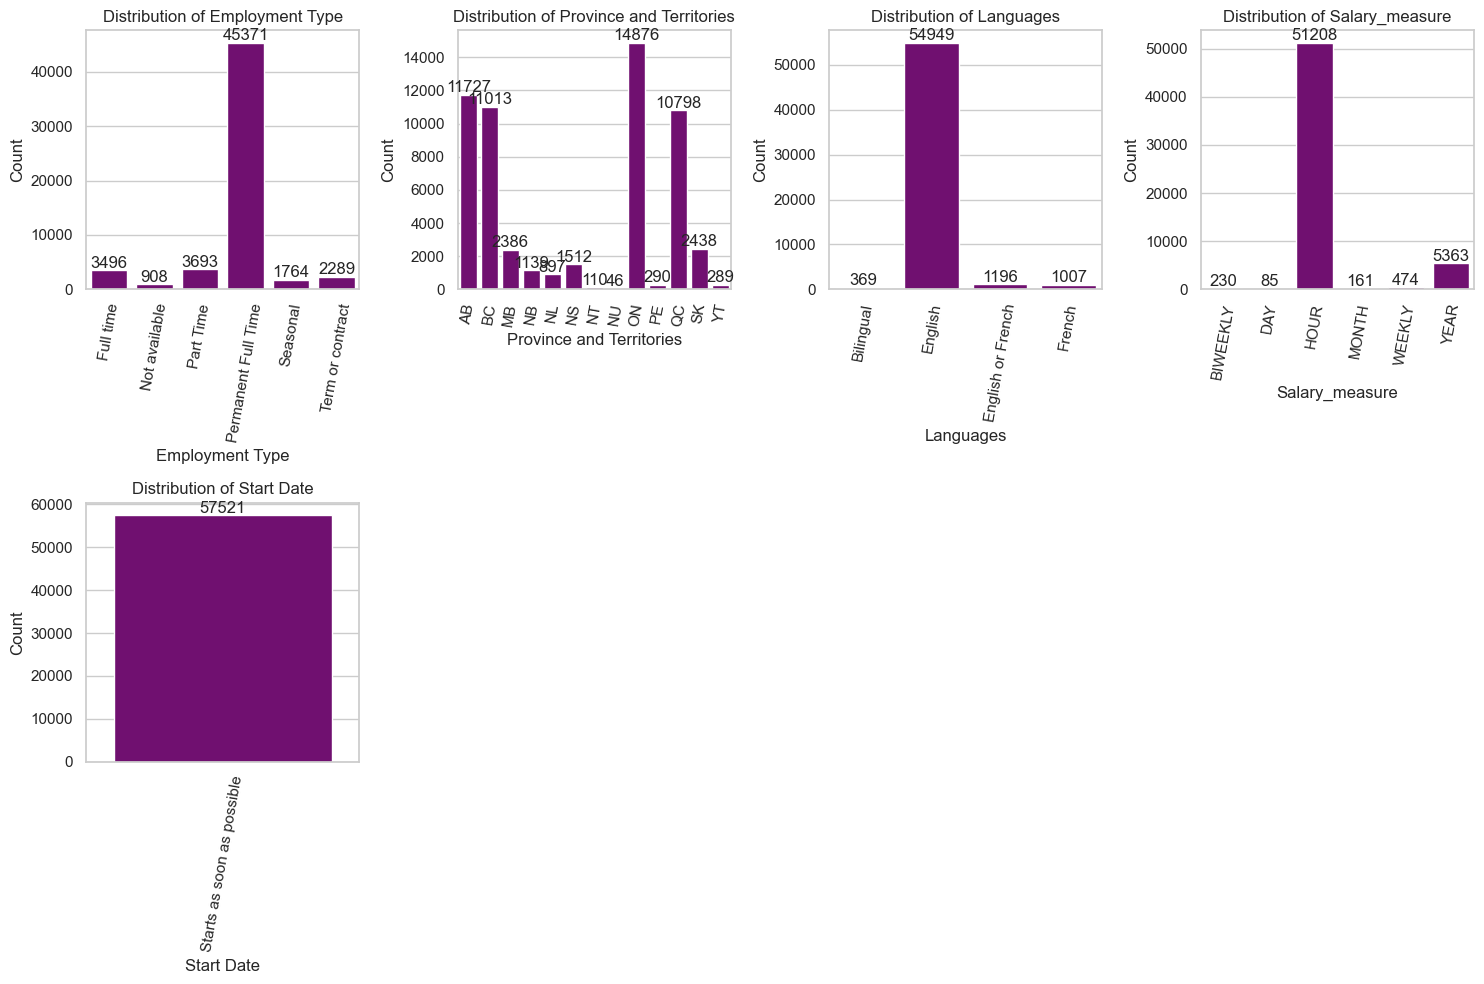

In [1371]:
cols_for_plot = ['Employment Type', 'Province and Territories',
       'Languages', 'Salary_measure','Start Date'
       ]
cols_per_row = 4  # Number of columns per row
num_plots = len(cols_for_plot)
num_rows = (num_plots - 1) // cols_per_row + 1

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5*num_rows))

# Iterate through columns and plot each one
for i, col in enumerate(cols_for_plot):
    row = i // cols_per_row
    col_idx = i % cols_per_row
    ax = axes[row] if num_rows == 1 else axes[row, col_idx]

    # Sort the data
    sorted_df = df[col].value_counts().sort_index().reset_index()

    sns.barplot(x='index', y=col, data=sorted_df, ax=ax,color='purple')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=80)

    # Add count values on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

# Remove empty subplots if necessary
if num_plots < num_rows * cols_per_row:
    for i in range(num_plots, num_rows * cols_per_row):
        axes.flat[i].set_visible(False)


plt.tight_layout()
plt.show()

#### Observation:
Language : English , JOb Start Date : Starts as soon as possible and Hourly payment type are dominant values in corresponding colulmns.

### 3.4.2 Pie Chart

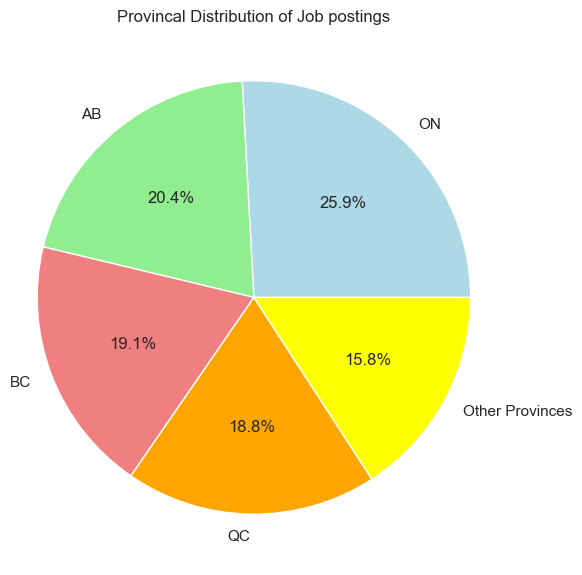

In [1372]:
column_name = 'Province and Territories'

# Counting the occurrences of each unique value in the selected column
column_count = df[column_name].value_counts()

# Grouping values with counts less than 10,000 into an "Other Provinces" category
threshold = 10000
other_provinces_count = column_count[column_count < threshold].sum()
column_count = column_count[column_count >= threshold]
column_count['Other Provinces'] = other_provinces_count

# Plotting the pie chart
plt.figure(figsize=(6, 6))

# Color definition
colors = ['lightblue', 'lightgreen', 'lightcoral', 'orange', 'yellow']

plt.pie(column_count, labels=column_count.index, colors=colors,
        autopct='%1.1f%%')
plt.title(f'{column_name}')
plt.title('Provincal Distribution of Job postings')
plt.axis('equal')
plt.tight_layout()
plt.show()


#### Observation:
Ontario Province has most number of job postings followed by Alberta, British Columbia and Quebec

## 3.5 Bi- Variate Analysis

### 3.5.1 Correlation Matrix

C:\Users\TravelMate\AppData\Local\Temp\ipykernel_15880\1686788553.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


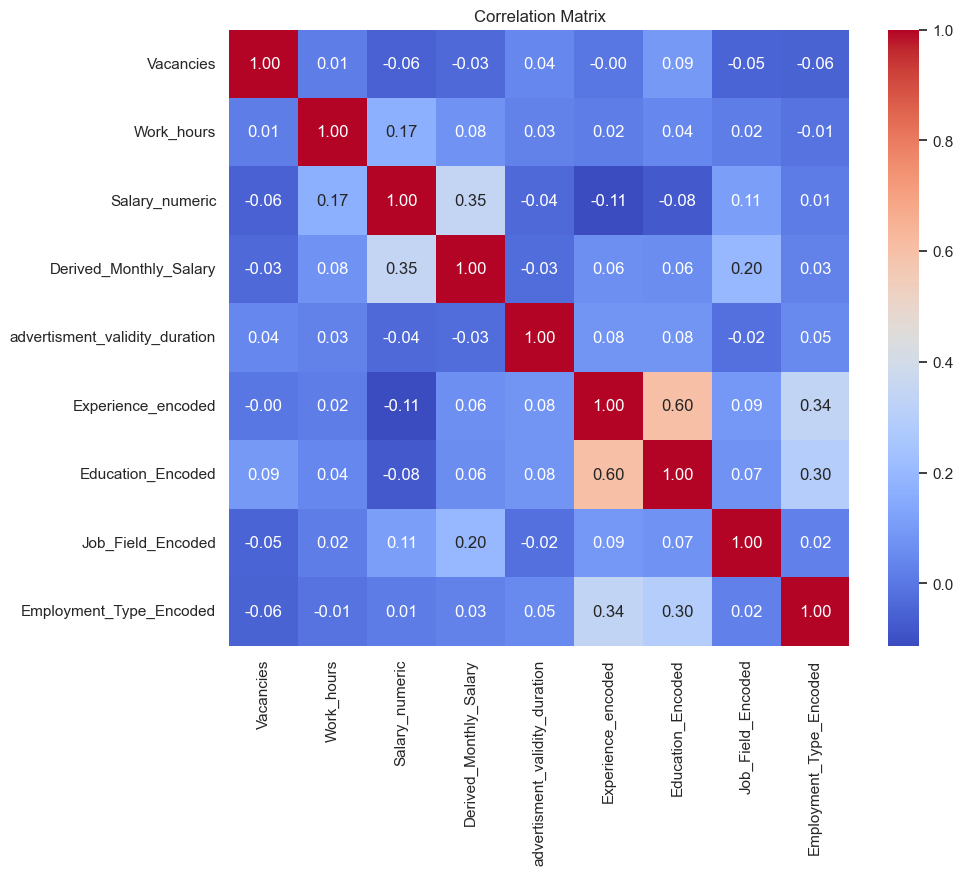

In [1373]:
# Generate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Step 4 : Using Pandas Profiling for EDA

In [1374]:
# pip install --user ydata-profiling


In [1375]:
from ydata_profiling import ProfileReport


In [1376]:
# profile = ProfileReport(df, title="Profiling Report")


In [1377]:
# profile.to_file('pandas_profiling_report_job_bank.html')


#### Observation:
The Pandas profiling report was very useful for taking a quick and easy glance at our dataset, which is submitted with our report.

# Step 5:  Outlier Detection

In [1378]:
# finding the categorical and numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(exclude=np.number).columns

In [1379]:
print('Numeric columns:\n',numeric_columns)
print('Categorical columns:\n',categorical_columns)

Numeric columns:
 Index(['Vacancies', 'Work_hours', 'Salary_numeric', 'Derived_Monthly_Salary',
       'advertisment_validity_duration', 'Experience_encoded',
       'Education_Encoded', 'Job_Field_Encoded', 'Employment_Type_Encoded'],
      dtype='object')
Categorical columns:
 Index(['Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Languages', 'Education', 'Experience',
       'Responsibilities', 'url', 'Work_hours_measure', 'Salary_measure',
       'Province and Territories', 'Title_and_Responsibilities_Text',
       'Job_Field'],
      dtype='object')


In [1380]:
def generate_plots(df, column, handled_outliers=False):
    # Set up the figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    title = ' of '+column + (' after' if handled_outliers else ' before') + ' outlier handling'

    # boxplot
    sns.boxplot(y=df[column], orient='v', color='purple', ax=axes[0], showfliers=False)
    axes[0].set_title('Boxplot '+ title)
    axes[0].set_ylabel(column)

    # histogram
    axes[1].hist(df[column], bins=100,color='purple')
    axes[1].set_title('Histogram '+ title)
    axes[1].set_xlabel('Values')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

## 5.1 IQR

In [1381]:
# Define a function for outlier detection using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers, Q1, Q3, IQR

In [1382]:
data = []

for n_c in numeric_columns:
    outliers, Q1, Q3, IQR = detect_outliers_iqr(df[n_c])
    num_outliers = outliers.sum()
    data.append([n_c, num_outliers, Q1, Q3, IQR])

# Define the column headers
headers = ["Numeric Column", "Number of Outliers", "Q1", "Q3", "IQR"]

# Print the table using tabulate
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))

╒════════════════════════════════╤══════════════════════╤══════╤═══════════╤════════════╕
│ Numeric Column                 │   Number of Outliers │   Q1 │        Q3 │        IQR │
╞════════════════════════════════╪══════════════════════╪══════╪═══════════╪════════════╡
│ Vacancies                      │                 5424 │    1 │    2      │    1       │
├────────────────────────────────┼──────────────────────┼──────┼───────────┼────────────┤
│ Work_hours                     │                 2534 │   35 │   40      │    5       │
├────────────────────────────────┼──────────────────────┼──────┼───────────┼────────────┤
│ Salary_numeric                 │                 7420 │   18 │   29      │   11       │
├────────────────────────────────┼──────────────────────┼──────┼───────────┼────────────┤
│ Derived_Monthly_Salary         │                 3729 │ 2880 │ 4480      │ 1600       │
├────────────────────────────────┼──────────────────────┼──────┼───────────┼────────────┤
│ advertis

### Observation
Columns which were categorical and has converted to numerical does not have outliers (Experience encoded column) whereas other columns which were scrapped values has outliers

In [1383]:
# droping it because monthly salary for each row is already calculated
df.drop(columns=['Salary_numeric'],inplace = True)

In [1384]:
#columns with outliers needs treatment
outlier_columns = ['Vacancies','Work_hours','Derived_Monthly_Salary','advertisment_validity_duration','Employment_Type_Encoded']

## 5.2 Box Plots

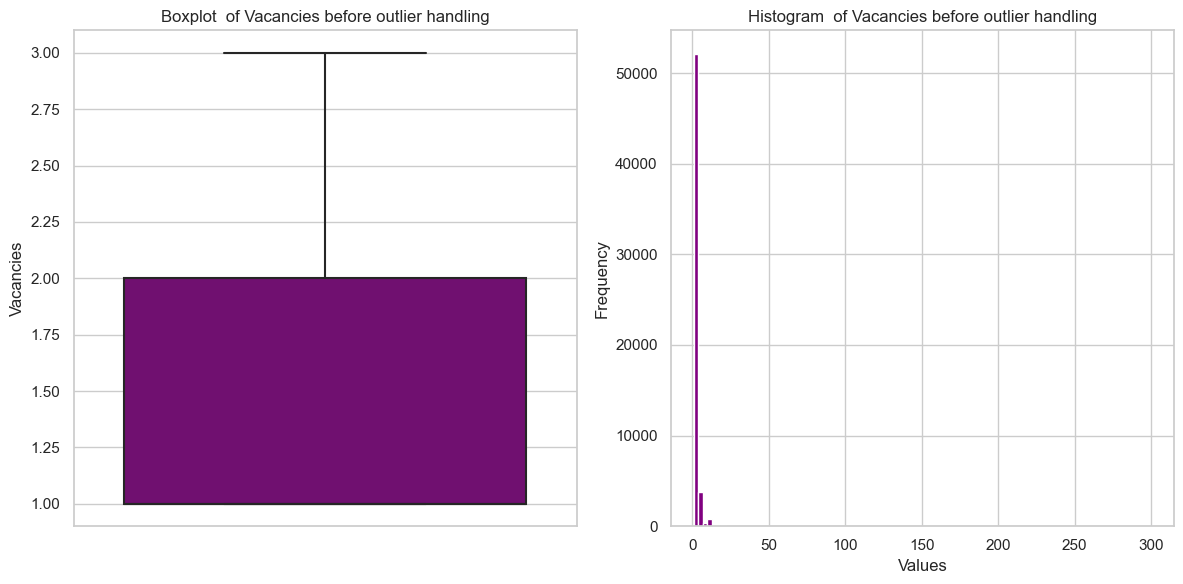

In [1385]:
generate_plots(df,'Vacancies')

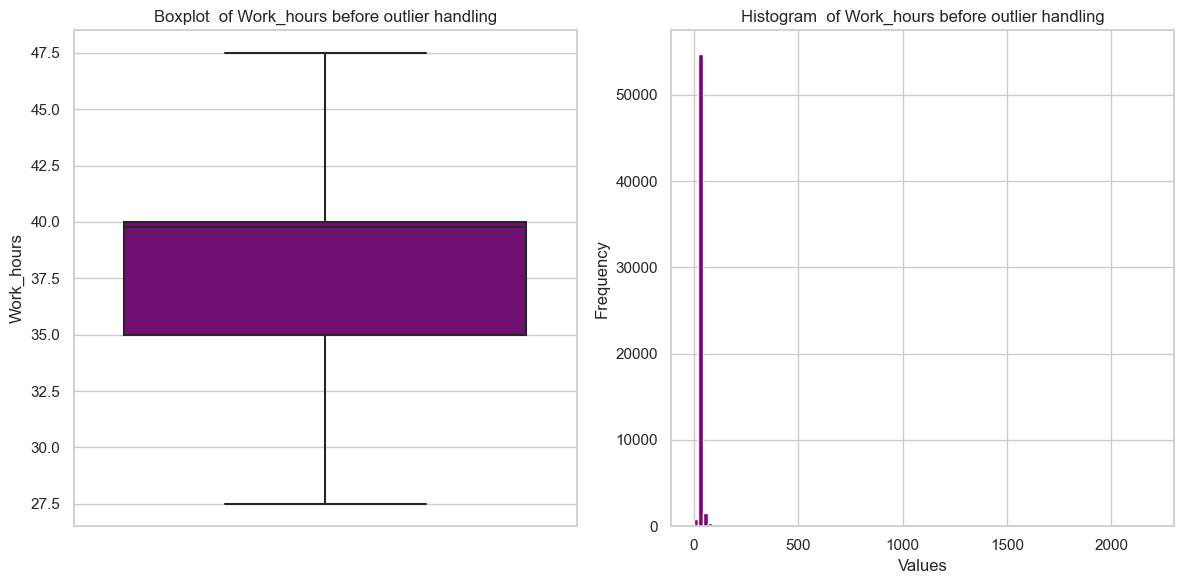

In [1386]:
generate_plots(df,'Work_hours')


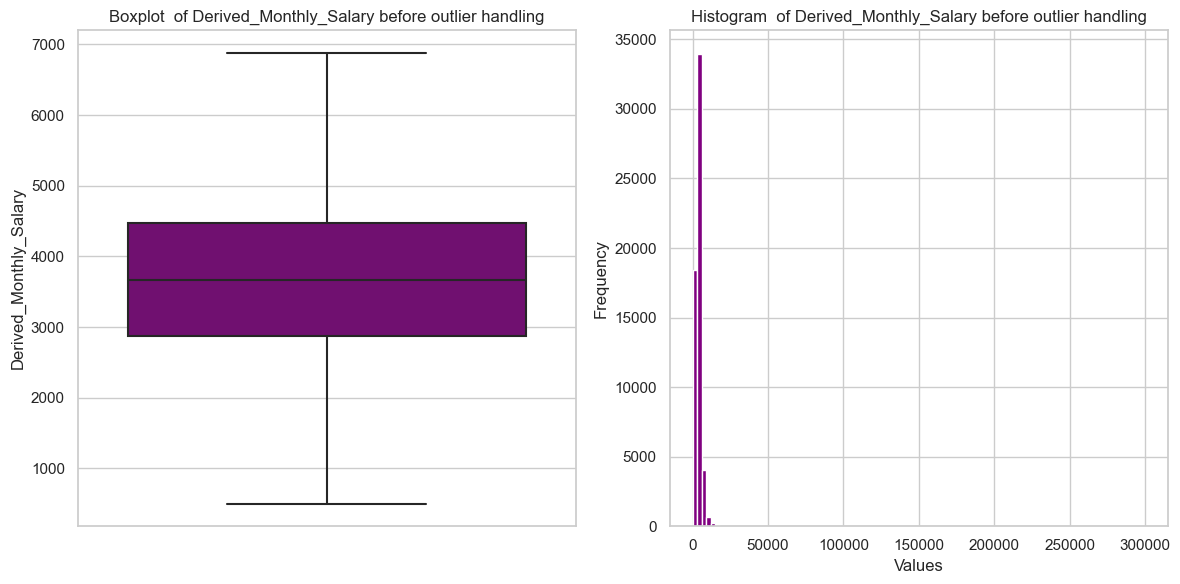

In [1387]:
generate_plots(df,'Derived_Monthly_Salary')


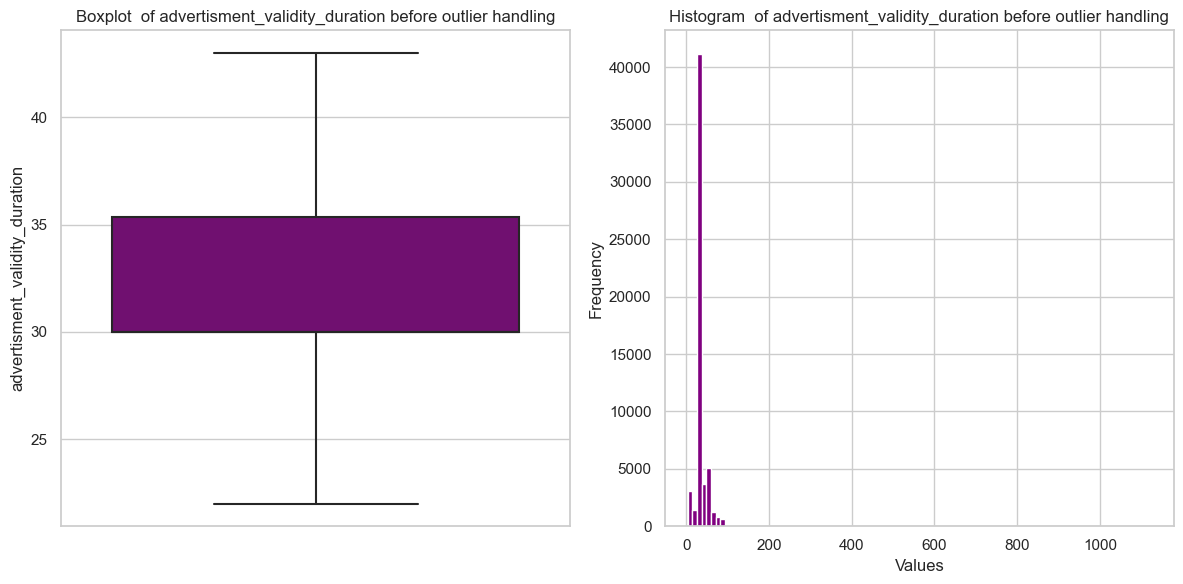

In [1388]:
generate_plots(df,'advertisment_validity_duration')


In [1389]:

def plot_salary_distribution(df, ylim=None):
    # Set the style for seaborn
    sns.set(style="whitegrid")

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Job_Field', y='Derived_Monthly_Salary', data=df, color='purple')

    # Add title and labels
    plt.title('Salary Distribution by Job field')
    plt.xlabel('Job field')
    plt.ylabel('Monthly salary')

    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=90)

    # Set the y-axis limits if specified
    if ylim:
        plt.ylim(ylim)

    # Show the plot
    plt.tight_layout()
    plt.show()


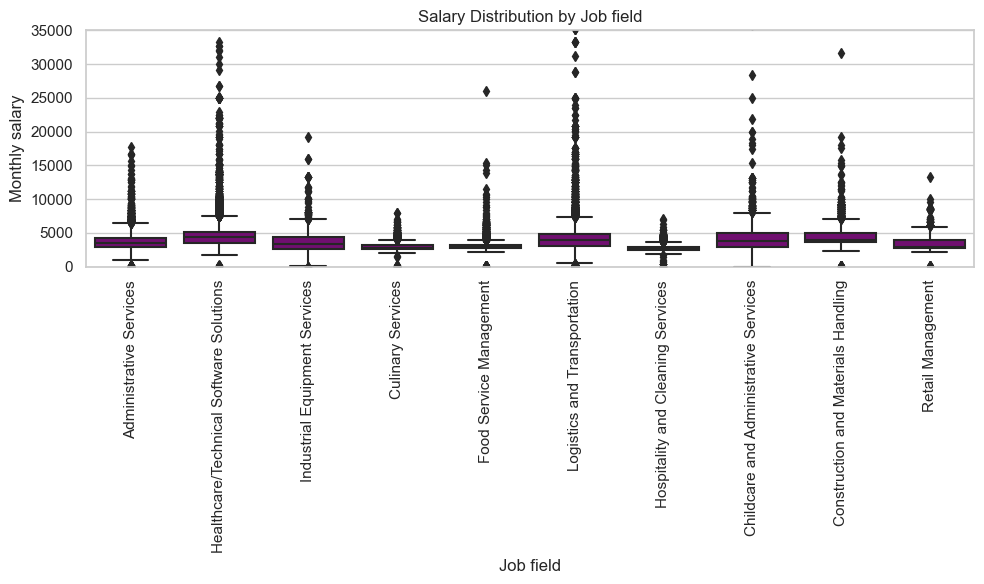

In [1390]:
plot_salary_distribution(df,ylim=(0, 35000))

# Step 6 Outlier Treatment

## 6.1 using Quantile based Flooring and Capping

In [1391]:
def quantile_flooring_and_capping(df, columns_to_process, floor_quantile=0.1, cap_quantile=0.9):
    # copy the dataframe to avoid modifying original
    df_processed = df.copy()

    # Iterate over each column to process
    for column in columns_to_process:
        # Calculate thresholds for flooring and capping
        floor_threshold = df_processed[column].quantile(floor_quantile)
        cap_threshold = df_processed[column].quantile(cap_quantile)

        # Floor values below the floor threshold
        df_processed[column] = df_processed[column].apply(lambda x: floor_threshold if x < floor_threshold else x)

        # Cap values above the cap threshold
        df_processed[column] = df_processed[column].apply(lambda x: cap_threshold if x > cap_threshold else x)

    return df_processed

In [1392]:
df_flooring_and_capping = quantile_flooring_and_capping(df, outlier_columns)


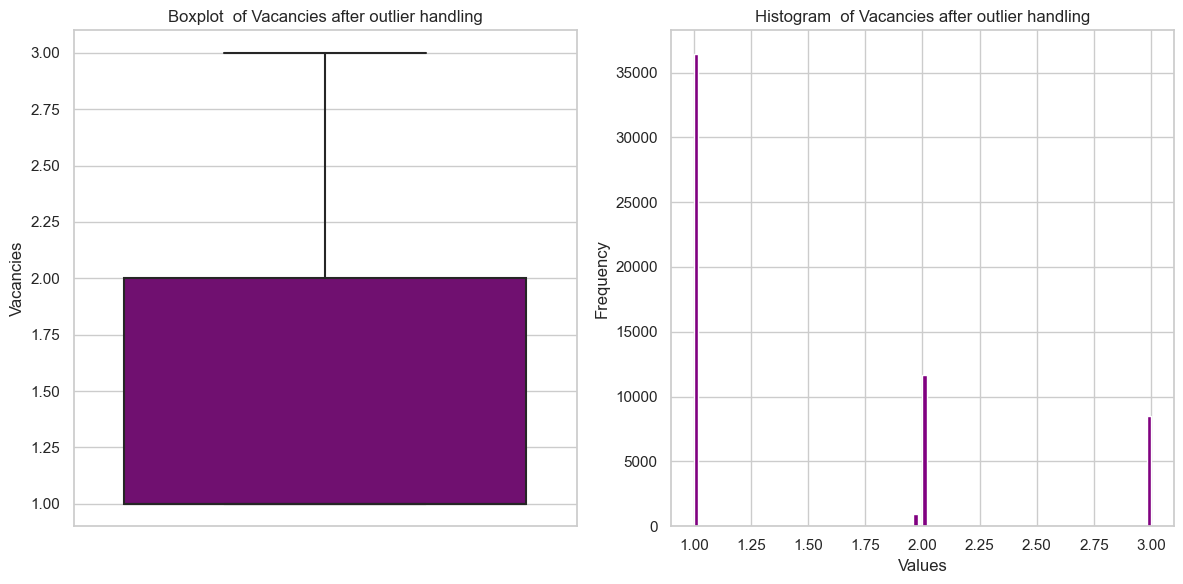

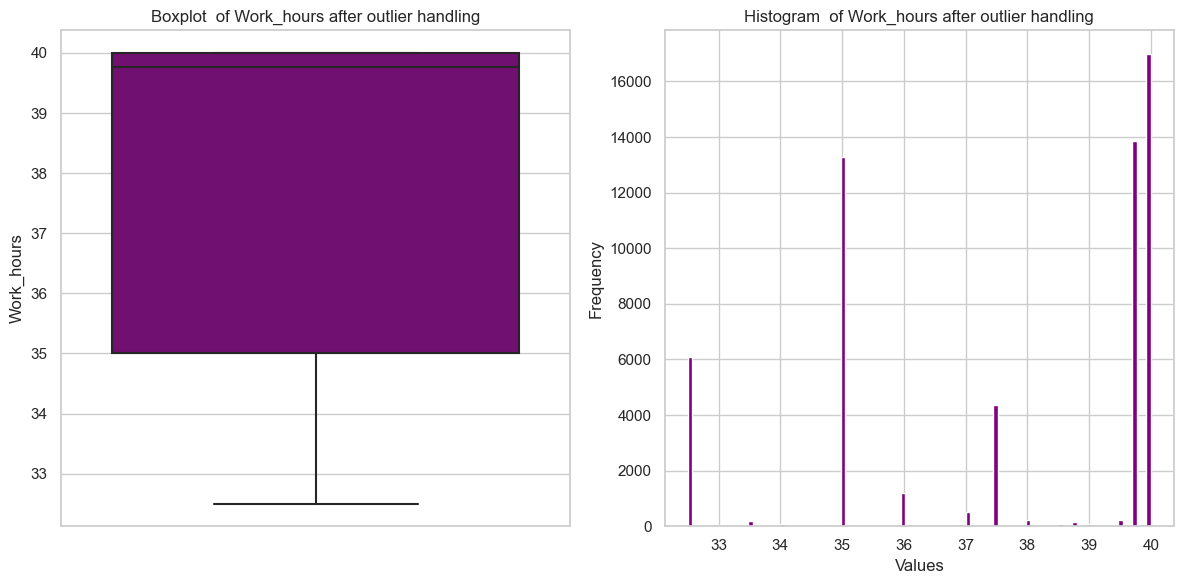

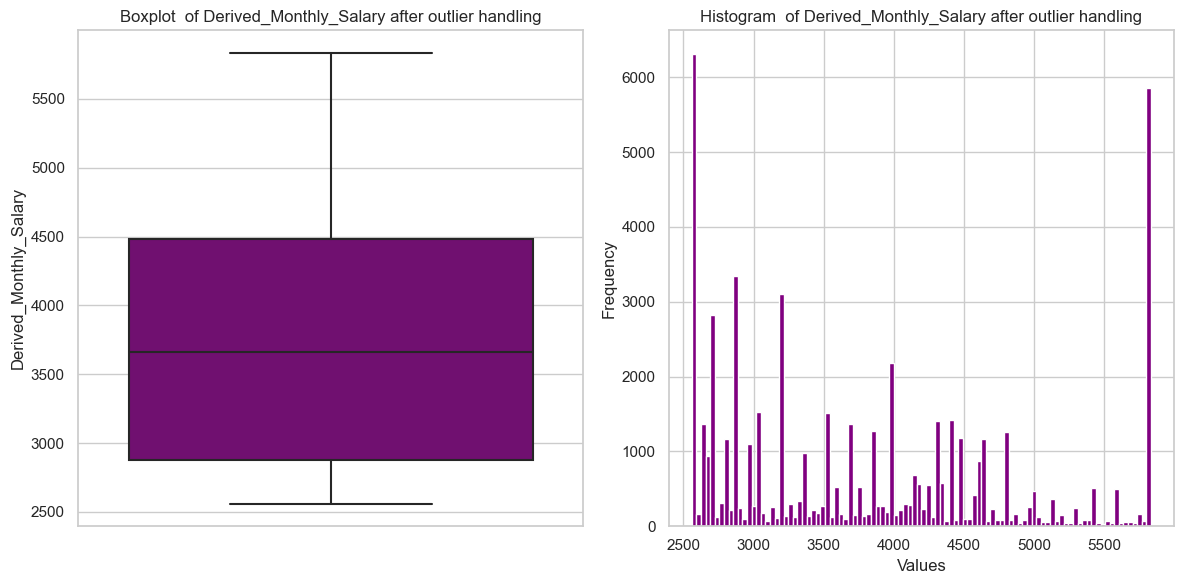

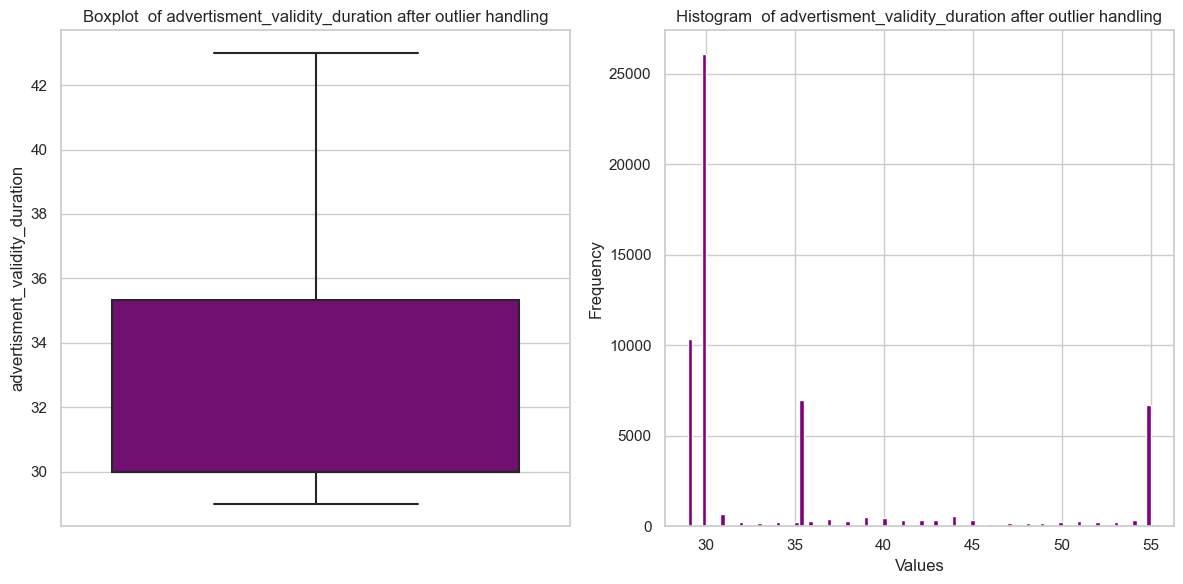

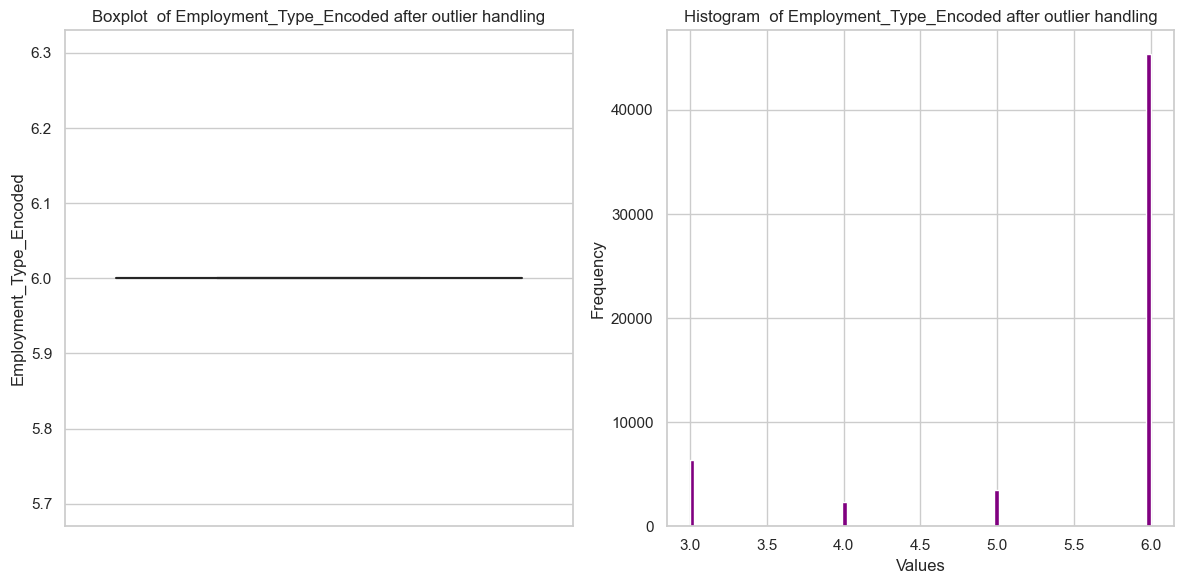

In [1393]:
for col in outlier_columns:
  generate_plots(df_flooring_and_capping,col, True)

In [1394]:
df_1_floor_capped = df_flooring_and_capping.copy()

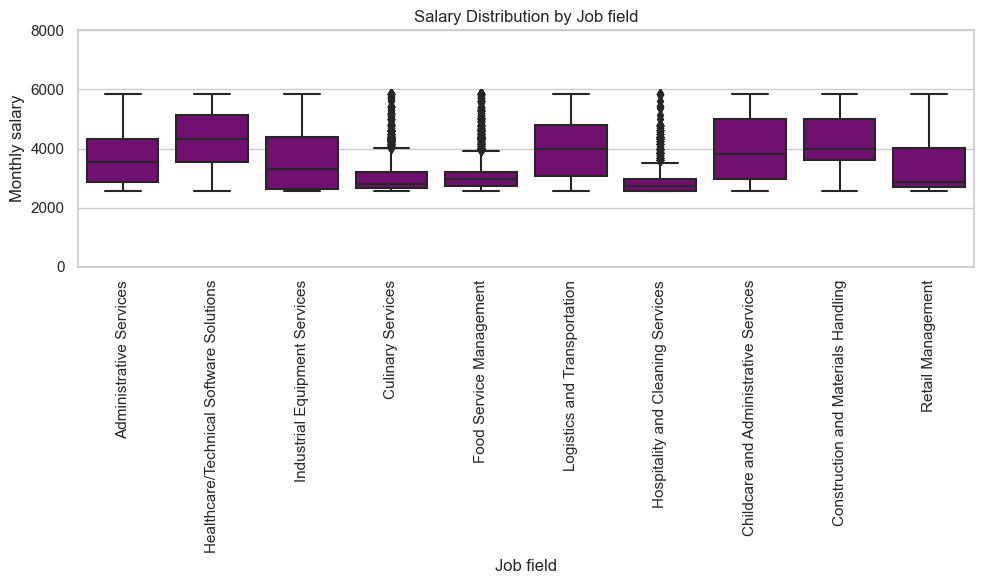

In [1395]:
plot_salary_distribution(df_flooring_and_capping,ylim=(0, 8000))

## 6.2 Log Tramsformation

In [1396]:
def log_transform(df, column):
    # Make a copy of the DataFrame to avoid modifying the original data
    df_log_transformed = df.copy()

    # Apply log transformation to the specified column
    df_log_transformed[column] = np.log(df_log_transformed[column])

    return df_log_transformed

In [1397]:
df_log = log_transform(df, outlier_columns)


In [1398]:
for column in outlier_columns:
    # Check for negative or zero values in the columns
    negative_values = (df[column] < 0).sum()
    zero_values = (df[column] == 0).sum()
    print(column)

    # Print the counts
    print(f"Number of negative values: {negative_values}")
    print(f"Number of zero values: {zero_values}")

    # Check if there are any negative or zero values
    if negative_values > 0 or zero_values > 0:
        print("Warning: The column contains negative or zero values. Log transformation may not be appropriate.")
    else:
        print("No negative or zero values found. Log transformation can be applied.")

Vacancies
Number of negative values: 0
Number of zero values: 0
No negative or zero values found. Log transformation can be applied.
Work_hours
Number of negative values: 0
Number of zero values: 0
No negative or zero values found. Log transformation can be applied.
Derived_Monthly_Salary
Number of negative values: 0
Number of zero values: 0
No negative or zero values found. Log transformation can be applied.
advertisment_validity_duration
Number of negative values: 0
Number of zero values: 0
No negative or zero values found. Log transformation can be applied.
Employment_Type_Encoded
Number of negative values: 0
Number of zero values: 0
No negative or zero values found. Log transformation can be applied.


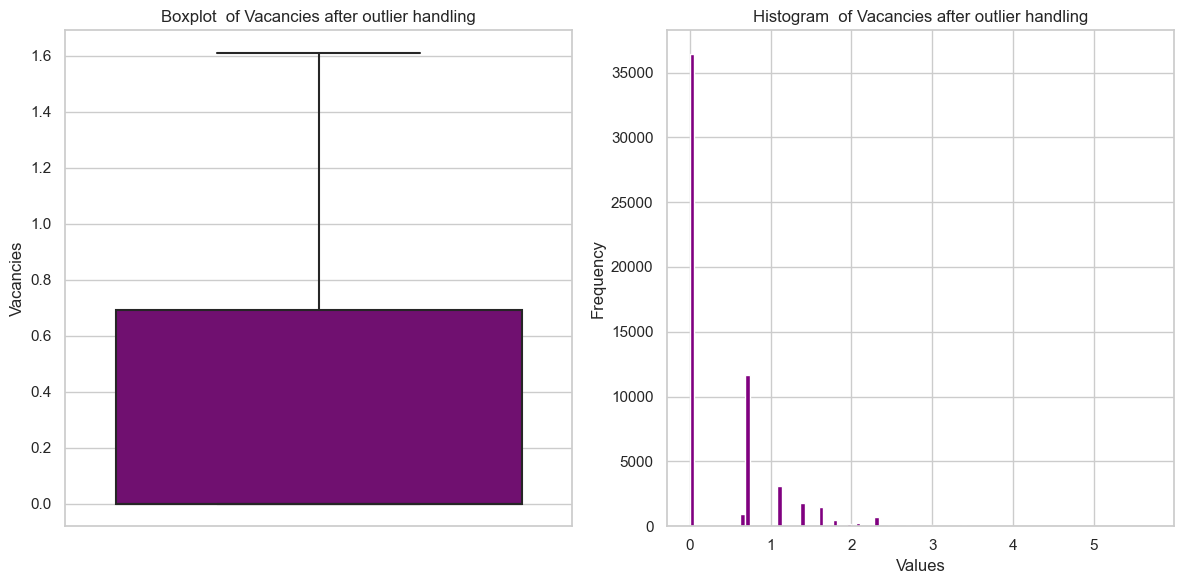

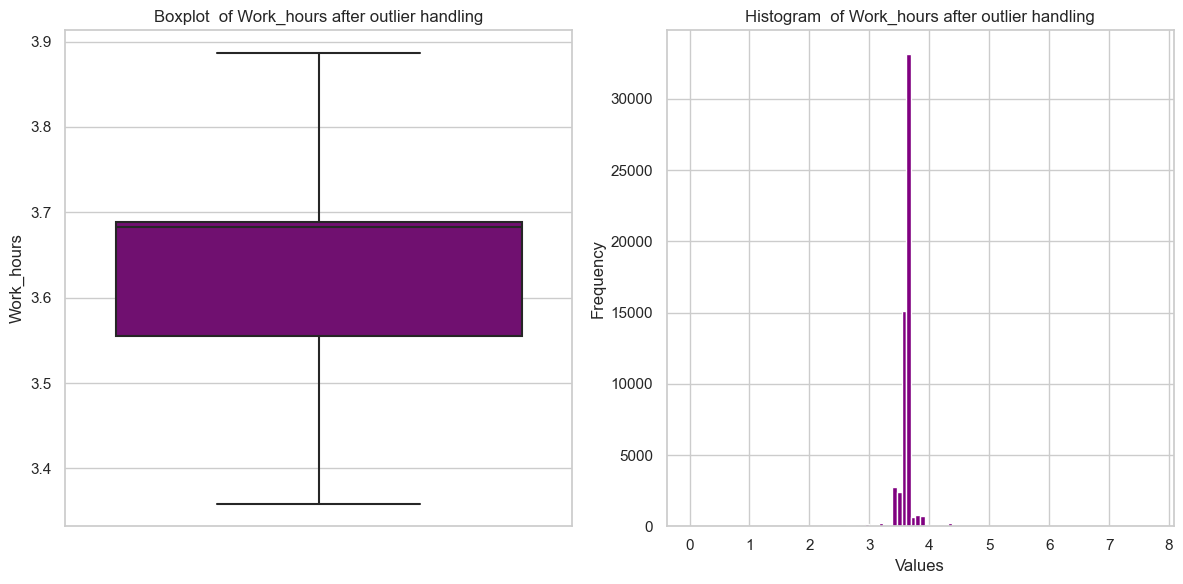

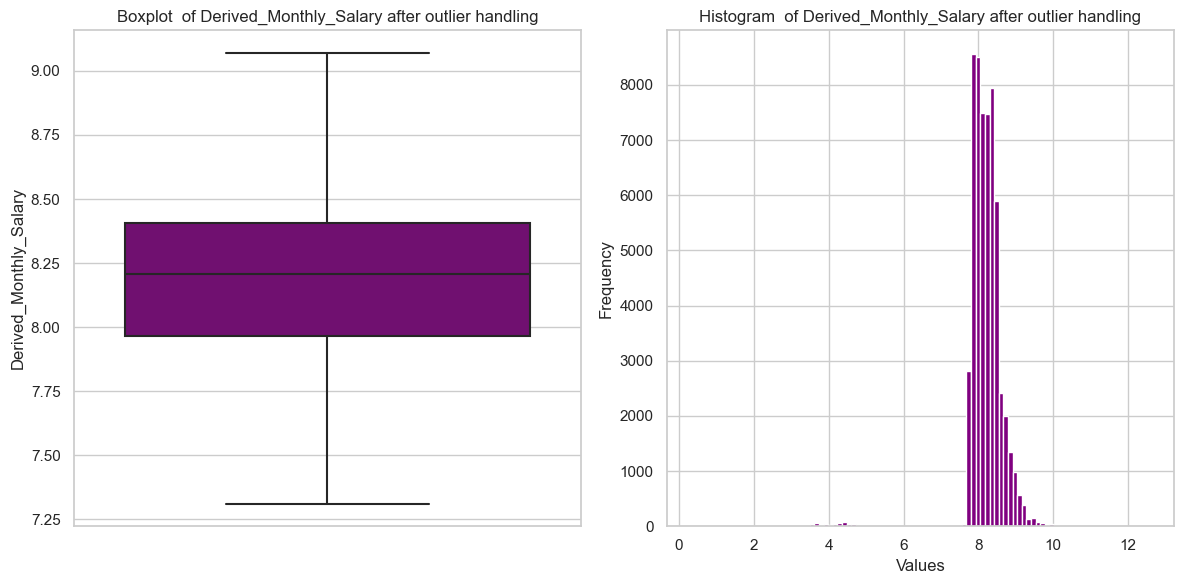

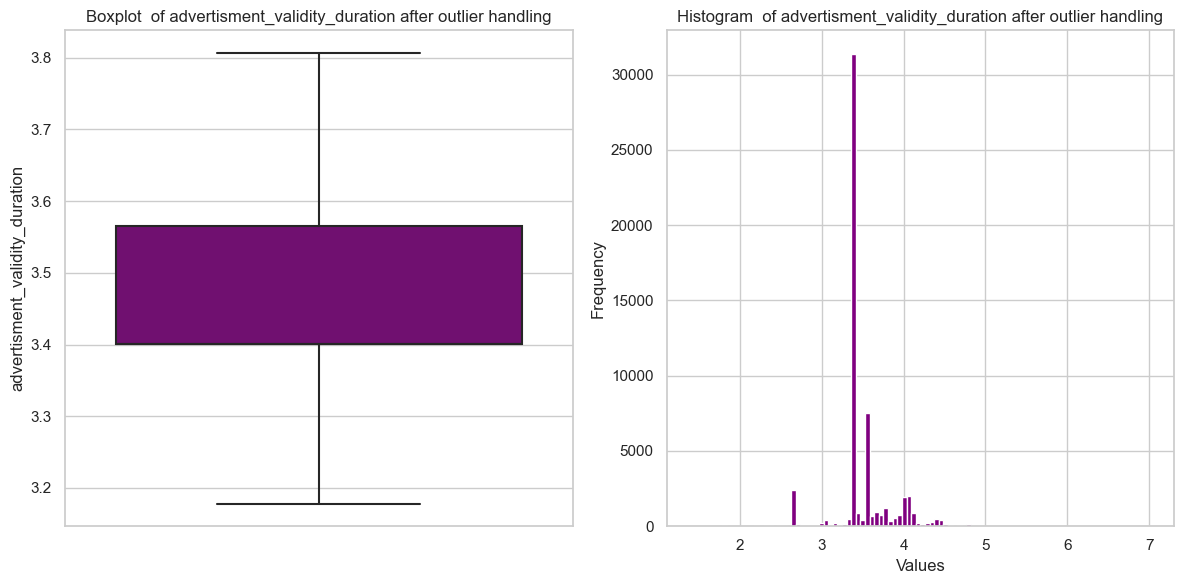

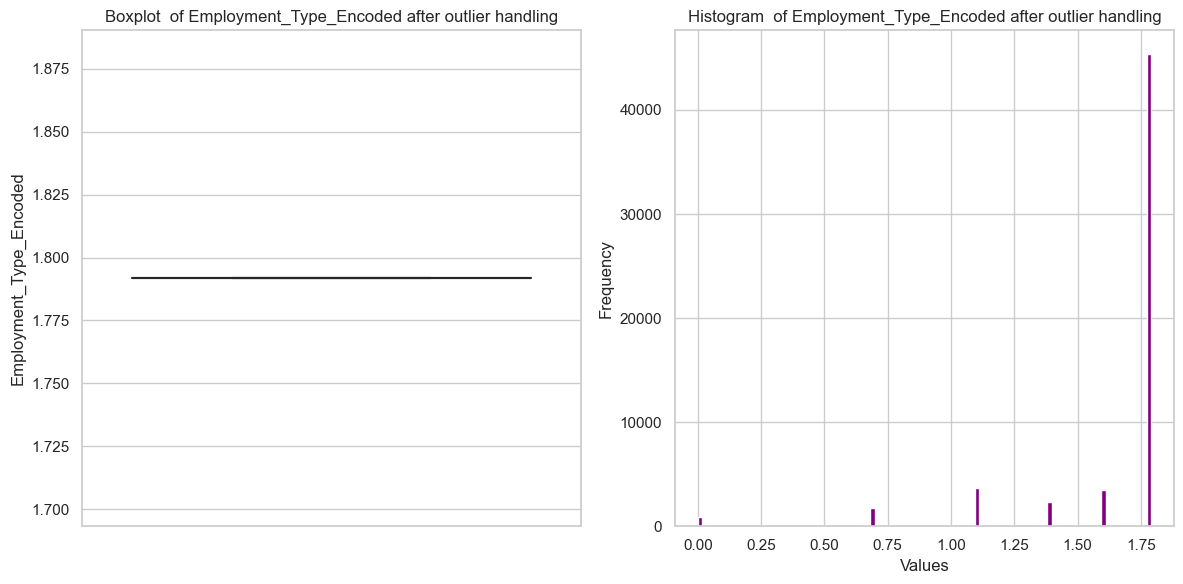

In [1399]:
for col in outlier_columns:
  generate_plots(df_log,col, True)

# Step 7:Using Supervised Learning For Model Building and Accuracy calculation

In [1400]:
# !pip install lightgbm

In [1401]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor

In [1402]:


# Step 1: Handling Categorical Columns using One Hot Encoding
df_encoded = pd.get_dummies(df_1_floor_capped, columns=['Province and Territories'], drop_first=True)

#For Values after log transform are passed
'''df_encoded = pd.get_dummies(df_log, columns=['Province and Territories'], drop_first=True)'''


# Step 2: Splitting Data
X = df_encoded.drop(columns=['Derived_Monthly_Salary','Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Languages', 'Education',
       'Experience', 'Responsibilities', 'url','Work_hours_measure',
       'Salary_measure','Title_and_Responsibilities_Text', 'Job_Field','Work_hours'])  # Features


y = df_encoded['Derived_Monthly_Salary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training and Evaluation


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ridge Regression": Ridge(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}



for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Model performance for", name)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R^2 Score:", r2)
    print()


Model performance for Linear Regression
Mean Absolute Error: 738.4942717847898
Mean Squared Error: 841300.4008073339
Root Mean Squared Error: 917.2242914398495
R^2 Score: 0.2476100581420546

Model performance for Decision Tree
Mean Absolute Error: 596.4075760412134
Mean Squared Error: 684635.2008020076
Root Mean Squared Error: 827.426855257918
R^2 Score: 0.3877185385493581

Model performance for Random Forest
Mean Absolute Error: 577.3057374141356
Mean Squared Error: 610602.6481020368
Root Mean Squared Error: 781.4106782621011
R^2 Score: 0.45392716981599457

Model performance for Ridge Regression
Mean Absolute Error: 738.5003313626072
Mean Squared Error: 841296.2238012933
Root Mean Squared Error: 917.2220144552208
R^2 Score: 0.24761379371299808

Model performance for Gradient Boosting
Mean Absolute Error: 629.9558773450923
Mean Squared Error: 653966.0629338565
Root Mean Squared Error: 808.6816820813098
R^2 Score: 0.41514649512147894

[LightGBM] [Warning] Found whitespace in feature_nam

## 7.1 Standardization

In [1403]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7.2 Regularization 

In [1404]:
# Ridge Regularization

regression = Ridge(alpha=0.5)
model = lgb.LGBMRegressor().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2 train:',r2_train.round(4))
r2_test = r2_score(y_test, y_pred_test)
print('r2 test:',r2_test.round(4))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 46016, number of used features: 18
[LightGBM] [Info] Start training from score 3813.777998
r2 train: 0.4812
r2 test: 0.4671


In [1405]:
# Lasso Regularization

regression = Lasso(alpha=0.5)
model = lgb.LGBMRegressor().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2 train:',r2_train.round(4))
r2_test = r2_score(y_test, y_pred_test)
print('r2 test:',r2_test.round(4))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 46016, number of used features: 18
[LightGBM] [Info] Start training from score 3813.777998
r2 train: 0.4812
r2 test: 0.4671


## 7.3 Hyperparameter Tuning and Training of Models

In [1406]:
from sklearn.model_selection import RandomizedSearchCV

In [1407]:
# Define parameter grids for each model
param_randgrid_linear_reg = {}

param_randgrid_ridge = {
#     'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 7.5, 10.0]
    'alpha': [0.01, 0.05]
    
}



param_randgrid_random_forest = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_randgrid_gradient_boosting = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

param_randgrid_lightgbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

param_randgrid_decision_tree = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Perform Grid Search with Cross-Validation for each model
linear_reg = RandomizedSearchCV(LinearRegression(), param_randgrid_linear_reg, cv=3, scoring='r2')
ridge = RandomizedSearchCV(Ridge(), param_randgrid_ridge, cv=3, n_iter=20, random_state=23, scoring='r2')
random_forest = RandomizedSearchCV(RandomForestRegressor(), param_randgrid_random_forest, cv=3, n_iter=20, random_state=23, scoring='r2')
gradient_boosting = RandomizedSearchCV(GradientBoostingRegressor(), param_randgrid_gradient_boosting, cv=3, n_iter=20, random_state=23, scoring='r2')
lightgbm = RandomizedSearchCV(lgb.LGBMRegressor(), param_randgrid_lightgbm, cv=3, n_iter=20, random_state=23, scoring='r2')
decision_tree = RandomizedSearchCV(DecisionTreeRegressor(), param_randgrid_decision_tree, cv=3, n_iter=20, random_state=23, scoring='r2')



# Fit the models with the best hyperparameters
linear_reg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Get the best hyperparameters
best_params_linear_reg = linear_reg.best_params_
best_params_ridge = ridge.best_params_
best_params_random_forest = random_forest.best_params_
best_params_gradient_boosting = gradient_boosting.best_params_
best_params_lightgbm = lightgbm.best_params_
best_params_decision_tree = decision_tree.best_params_

# Get the best models which will contain the best combination of hyperparameters found during the ramdomized search for each model
best_model_linear_reg = linear_reg.best_estimator_
best_model_ridge = ridge.best_estimator_
best_model_random_forest = random_forest.best_estimator_
best_model_gradient_boosting = gradient_boosting.best_estimator_
best_model_lightgbm = lightgbm.best_estimator_
best_model_decision_tree = decision_tree.best_estimator_

C:\Users\TravelMate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\TravelMate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\TravelMate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\TravelMate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\TravelMate\anaconda3\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 30677, number of used features: 18
[LightGBM] [Info] Start training from score 3814.773797
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 30677, number of used features: 17
[LightGBM] [Info] Start training from score 3809.931788
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

C:\Users\TravelMate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [1408]:
# Predict using the best models
y_pred_linear_reg = best_model_linear_reg.predict(X_test)
y_pred_ridge = best_model_ridge.predict(X_test)
y_pred_random_forest = best_model_random_forest.predict(X_test)
y_pred_gradient_boosting = best_model_gradient_boosting.predict(X_test)
y_pred_lightgbm = best_model_lightgbm.predict(X_test)
y_pred_decision_tree = best_model_decision_tree.predict(X_test)

In [1409]:
LinReg_mse = mean_squared_error(y_test, y_pred_linear_reg)
LinReg_mae = mean_absolute_error(y_test, y_pred_linear_reg)
LinReg_r2 = r2_score(y_test, y_pred_linear_reg)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)


rf_mse = mean_squared_error(y_test, y_pred_random_forest)
rf_mae = mean_absolute_error(y_test, y_pred_random_forest)
rf_r2 = r2_score(y_test, y_pred_random_forest)

# Evaluate Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, y_pred_gradient_boosting)
gb_mae = mean_absolute_error(y_test, y_pred_gradient_boosting)
gb_r2 = r2_score(y_test, y_pred_gradient_boosting)


lightgbm_mse = mean_squared_error(y_test, y_pred_lightgbm)
lightgbm_mae = mean_absolute_error(y_test, y_pred_lightgbm)
lightgbm_r2 = r2_score(y_test, y_pred_lightgbm)

decision_tree_mse = mean_squared_error(y_test, y_pred_decision_tree)
decision_tree_mae = mean_absolute_error(y_test, y_pred_decision_tree)
decision_tree_r2 = r2_score(y_test, y_pred_decision_tree)



# Print the results
print("Linear Regression:")
print(f"Mean Squared Error: {LinReg_mse}")
print(f"Mean Absolute Error: {LinReg_mae}")
print(f"R-squared (r2) Score: {LinReg_r2}")
print("\n")

print("Ridge Regression:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"R-squared (r2) Score: {ridge_r2}")
print("\n")


print("Random Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared (r2) Score: {rf_r2}")
print("\n")

print("Gradient Boosting Regressor:")
print(f"Mean Squared Error: {gb_mse}")
print(f"Mean Absolute Error: {gb_mae}")
print(f"R-squared (r2) Score: {gb_r2}")
print("\n")



print("Decision Tree:")
print(f"Mean Squared Error: {decision_tree_mse}")
print(f"Mean Absolute Error: {decision_tree_mae}")
print(f"R-squared (r2) Score: {decision_tree_r2}")
print("\n")


print("LightGbm:")
print(f"Mean Squared Error: {lightgbm_mse}")
print(f"Mean Absolute Error: {lightgbm_mae}")
print(f"R-squared (r2) Score: {lightgbm_r2}")




Linear Regression:
Mean Squared Error: 841300.4008073332
Mean Absolute Error: 738.494271784789
R-squared (r2) Score: 0.24761005814205528


Ridge Regression:
Mean Squared Error: 841300.3978167723
Mean Absolute Error: 738.4943193609001
R-squared (r2) Score: 0.2476100608165671


Random Forest Regressor:
Mean Squared Error: 593701.6527617222
Mean Absolute Error: 572.8624567584664
R-squared (r2) Score: 0.4690420311535596


Gradient Boosting Regressor:
Mean Squared Error: 653966.0629338564
Mean Absolute Error: 629.9558773450921
R-squared (r2) Score: 0.41514649512147905


Decision Tree:
Mean Squared Error: 642716.8466178551
Mean Absolute Error: 605.6640194793501
R-squared (r2) Score: 0.4252068697532059


LightGbm:
Mean Squared Error: 595858.0483809524
Mean Absolute Error: 588.9194004518661
R-squared (r2) Score: 0.4671135281206138


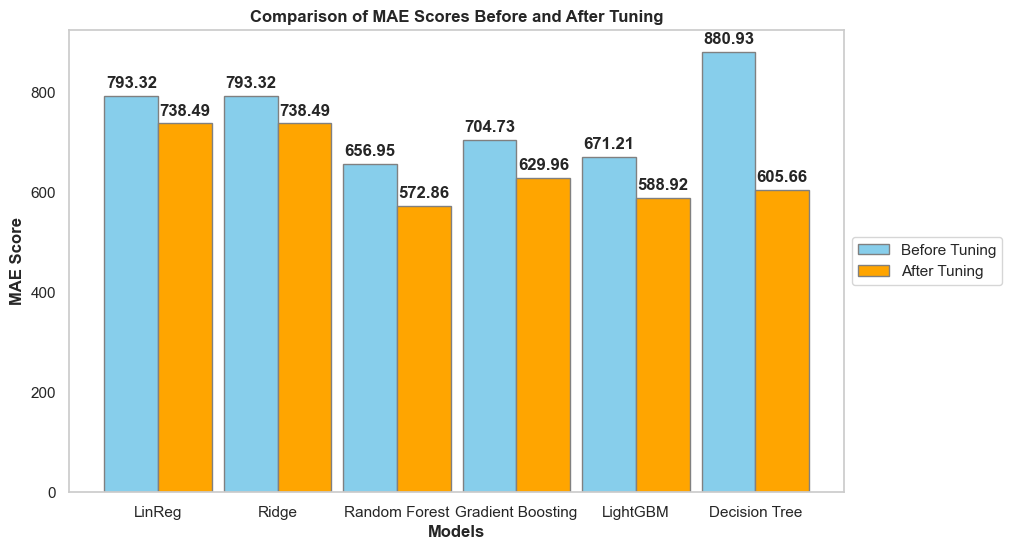

In [1410]:



# Define the models and their MAE scores before and after tuning
models = ['LinReg', 'Ridge', 'Random Forest', 'Gradient Boosting', 'LightGBM', 'Decision Tree']
before_tuning = [793.32129405348, 793.3180760631427, 656.9507996533628, 704.7340161182697,671.2093907630048,880.9255094464835]
after_tuning = [LinReg_mae, ridge_mae, rf_mae, gb_mae,lightgbm_mae,decision_tree_mae]

# Define the colors for bars
colors = ['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue']  # Before tuning (skyblue)
colors_after = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange']  # After tuning (orange)

# Set the width of the bars
bar_width = 0.45

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, before_tuning, color=colors, width=bar_width, edgecolor='grey', label='Before Tuning')
plt.bar(r2, after_tuning, color=colors_after, width=bar_width, edgecolor='grey', label='After Tuning')

# Add annotations above each bar for MAE scores before tuning
for i, score in enumerate(before_tuning):
    plt.text(i, score + 10, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# Add annotations above each bar for MAE scores after tuning
for i, score in enumerate(after_tuning):
    plt.text(i + bar_width, score + 10, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('MAE Score', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.title('Comparison of MAE Scores Before and After Tuning', fontweight='bold')

# Remove background grid
plt.grid(False)

# Place legend outside of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()


In [1411]:
#Perform cross-validation and calculate the mean r2 score (the goodness of fit of the model) for the different regression models.
#provides an indication of how well the model fits the data, with higher values indicating better fit.
#The output helps to understand which model performs better on the given training data.
from sklearn.model_selection import cross_val_score

models = [
    ('Linear Regression', best_model_linear_reg),
    ('Ridge Regression', best_model_ridge),
    ('Random Forest Regressor', best_model_random_forest),
    ('Gradient Boosting Regressor', best_model_gradient_boosting),
     ('Light GBM', best_model_lightgbm),
    ('Decision Tree', best_model_decision_tree)
]

print('Cross validation mean r2 score')
for name, model in models:
    result = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    print(name, ':', result.mean())


Cross validation mean r2 score
Linear Regression : 0.2399911117995776
Ridge Regression : 0.23999111264927858
Random Forest Regressor : 0.4616711929874408
Gradient Boosting Regressor : 0.41370879138988237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 41414, number of used features: 18
[LightGBM] [Info] Start training from score 3811.999653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 41414, number of used features: 18
[LightGBM] [Info] Start training fro

## 7.4 Feature Importance

In [1412]:
feature_importance = best_model_random_forest.feature_importances_
feature_names = X.columns

                           Feature  Importance
12     Province and Territories_NU    0.000230
11     Province and Territories_NT    0.000428
17     Province and Territories_YT    0.001446
14     Province and Territories_PE    0.002500
9      Province and Territories_NL    0.006846
16     Province and Territories_SK    0.008096
7      Province and Territories_MB    0.009736
8      Province and Territories_NB    0.012621
10     Province and Territories_NS    0.013991
13     Province and Territories_ON    0.019362
6      Province and Territories_BC    0.021700
15     Province and Territories_QC    0.047439
5          Employment_Type_Encoded    0.049123
0                        Vacancies    0.051378
1   advertisment_validity_duration    0.089811
2               Experience_encoded    0.140150
3                Education_Encoded    0.153715
4                Job_Field_Encoded    0.371427


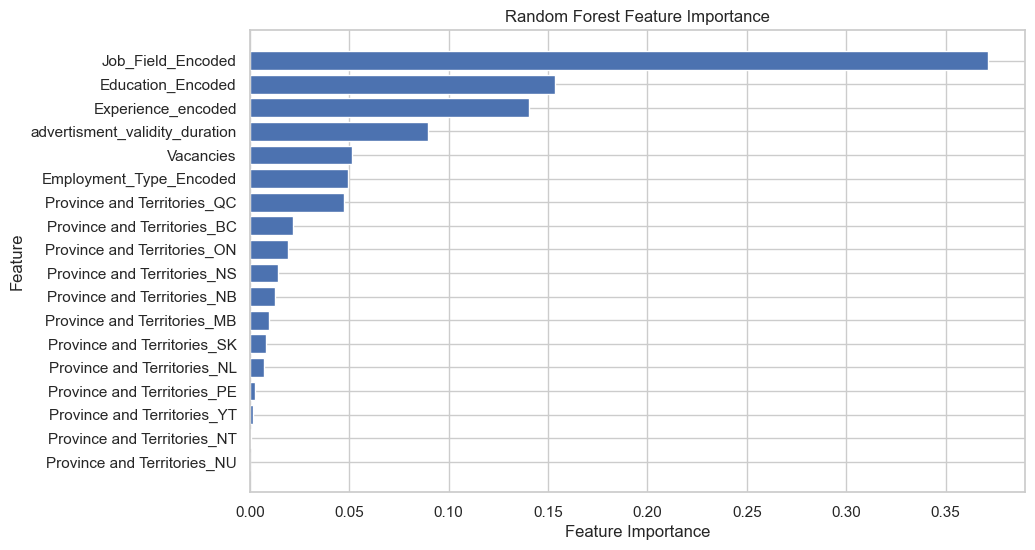

In [1413]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Sort in descending order
print(feature_importance_df)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

                           Feature  Importance
12     Province and Territories_NU    0.000230
11     Province and Territories_NT    0.000428
17     Province and Territories_YT    0.001446
14     Province and Territories_PE    0.002500
9      Province and Territories_NL    0.006846
16     Province and Territories_SK    0.008096
7      Province and Territories_MB    0.009736
8      Province and Territories_NB    0.012621
10     Province and Territories_NS    0.013991
13     Province and Territories_ON    0.019362
6      Province and Territories_BC    0.021700
15     Province and Territories_QC    0.047439
5          Employment_Type_Encoded    0.049123
0                        Vacancies    0.051378
1   advertisment_validity_duration    0.089811
2               Experience_encoded    0.140150
3                Education_Encoded    0.153715
4                Job_Field_Encoded    0.371427


Text(0, 0.5, 'Feature')

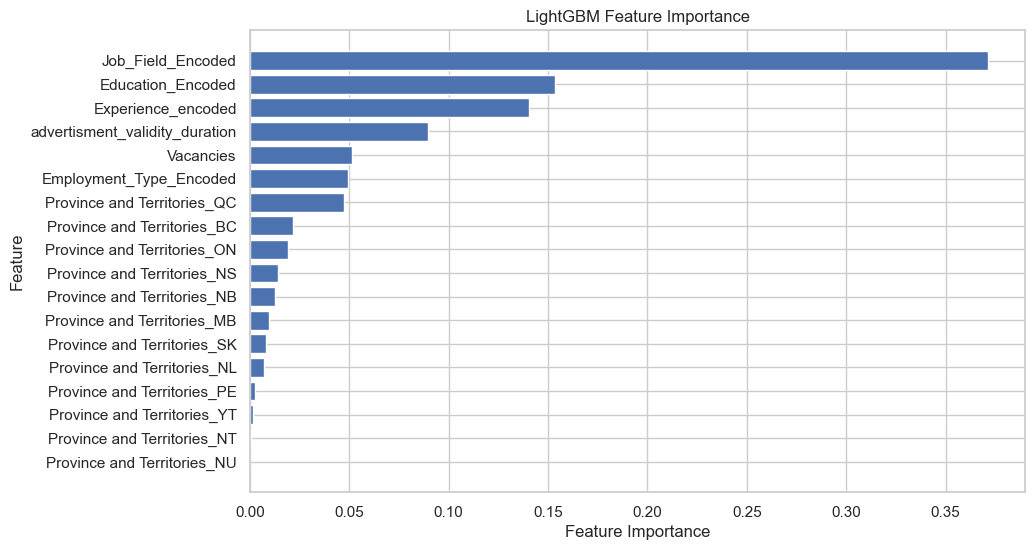

In [1414]:
# Create and view DataFrame for feature importances
feature_importance_df2 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=True)  # Sort in descending order
print(feature_importance_df2)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df2)), feature_importance_df2['Importance'], align='center')
plt.yticks(range(len(feature_importance_df2)), feature_importance_df2['Feature'])
plt.title('LightGBM Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

## 7.5 Principal Component Analysis (PCA)

In [1415]:
# PCA approach to see if r2 score incrases
from sklearn.decomposition import PCA


# Step 1: Handling Categorical Columns
df_encoded = pd.get_dummies(df_1_floor_capped, columns=['Province and Territories'], drop_first=True)

# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Applying PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Step 4: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 5: Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
   "Ridge Regression": Ridge(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Model performance for", name)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R^2 Score:", r2)
    print()


Model performance for Linear Regression
Mean Absolute Error: 742.751947508582
Mean Squared Error: 847298.3588518106
Root Mean Squared Error: 920.488109022496
R^2 Score: 0.24224597736898046

Model performance for Decision Tree
Mean Absolute Error: 609.9827991586465
Mean Squared Error: 720693.7689912273
Root Mean Squared Error: 848.9368462914231
R^2 Score: 0.35547071839221434

Model performance for Random Forest
Mean Absolute Error: 582.3165263902001
Mean Squared Error: 617484.7107920732
Root Mean Squared Error: 785.8019539248253
R^2 Score: 0.44777241850213534

Model performance for Ridge Regression
Mean Absolute Error: 742.7528129249172
Mean Squared Error: 847298.3697780992
Root Mean Squared Error: 920.4881149575475
R^2 Score: 0.2422459675974058

Model performance for Gradient Boosting
Mean Absolute Error: 655.8940805369987
Mean Squared Error: 686699.5706769662
Root Mean Squared Error: 828.6733799736578
R^2 Score: 0.38587233577957103

[LightGBM] [Info] Auto-choosing col-wise multi-threa

# 7.8 Recursive Feature Elimination (RFE)

In [1416]:
from sklearn.feature_selection import RFE

# Step 1: Handling Categorical Columns
df_encoded = pd.get_dummies(df_1_floor_capped, columns=['Province and Territories'], drop_first=True)

# Step 2: Splitting Data
X = df_encoded.drop(columns=['Derived_Monthly_Salary','Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Languages', 'Education',
       'Experience', 'Responsibilities', 'url','Work_hours_measure',
       'Salary_measure','Title_and_Responsibilities_Text', 'Job_Field','Work_hours'])  # Features
y = df_encoded['Derived_Monthly_Salary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (Optional, but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply Recursive Feature Elimination (RFE)
estimator = RandomForestRegressor()  # Choose your estimator
rfe = RFE(estimator, n_features_to_select=10)  # Choose the number of features to select
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Step 5: Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ridge Regression": Ridge(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

for name, model in models.items():
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Model performance for", name)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R^2 Score:", r2)
    print()


Model performance for Linear Regression
Mean Absolute Error: 739.6672241319098
Mean Squared Error: 843368.946794588
Root Mean Squared Error: 918.3512110269078
R^2 Score: 0.24576012060061625

Model performance for Decision Tree
Mean Absolute Error: 602.7279391273843
Mean Squared Error: 685443.0836702008
Root Mean Squared Error: 827.9149012248788
R^2 Score: 0.38699603450247466

Model performance for Random Forest
Mean Absolute Error: 585.391404078251
Mean Squared Error: 621159.6431018695
Root Mean Squared Error: 788.1368175018025
R^2 Score: 0.4444858610438883

Model performance for Ridge Regression
Mean Absolute Error: 739.6680927763175
Mean Squared Error: 843368.987149457
Root Mean Squared Error: 918.3512329982777
R^2 Score: 0.24576008451053777

Model performance for Gradient Boosting
Mean Absolute Error: 631.0857053225751
Mean Squared Error: 656633.7311852287
Root Mean Squared Error: 810.3293967179203
R^2 Score: 0.41276075186185357

[LightGBM] [Info] Auto-choosing row-wise multi-thread

In [1417]:
# Hyperparameter tuning done

## Step 8:  Result Comparison

## 8.1 Metrics

Random Forest Regressor:

Model performance for Random Forest


- Mean Absolute Error: 572.7715424680825
- Mean Squared Error (MSE): 594102.0581889027
- Root Mean Squared Error: 787.9698702870045
- R-squared (r2) Score: 0.4686839414441206
- Cross-validation Score: 0.46142372674313237
    
    
    
LightGBM Regressor:

Model performance for LightGBM

- Mean Absolute Error: 588.9194004518661 
- Mean Squared Error (MSE): 595858.0483809524
- Root Mean Squared Error: 778.5137895667156
- R-squared (r2) Score: 0.4671135281206138
- Cross-validation Score: 0.4643900010829257

## 8.2 Model Comparison

Metrics/results are compared between the Random Forest Regressor and LightGBM Regressor, as both models had the best performnce out of the 6 models.

Mean Squared Error (MSE):
Lower MSE indicates better model performance. In this case, Random Forest Regressor has a lower MSE compared to LightGBM. Therefore, Random Forest Regressor performs better in terms of minimizing prediction errors.

R-squared (r2) Score:
R-squared measures how well the model explains the variance in the target variable. Higher R-squared indicates a better fit. Random Forest Regressor has a higher R-squared ( 0.468) compared to LightGBM ( 0.467), suggesting that Random Forest Regressor explains more of the variance in the target variable.

Cross-validation Score:
Cross-validation provides an estimate of how well the model generalizes to unseen data. The cross-validation score is slightly higher for LightGBM Regressor compared to Random Forest . However, we cannot directly compare the absolute values of cross-validation scores between models.

## 8.3 Model Selection:

Both models perform well, but based on the considered metrics, Random Forest Regressor seems to be the better choice. It has lower Mean Squared Error, a higher R-squared score, and acceptable cross-validation score. Random Forest Regressor is often preferred for its ability to capture complex relationships in the data, and in this case, it appears to provide a good fit to the training data.

Based on the analysis, Random Forest Regressor is identified as the preferred model due to lower MSE, higher R-squared, and acceptable cross-validation score.

The machine learning model, Random Forest Regressor, provides a solid foundation for predicting salaries in Canadian Job Market.

# Step 9: Using NLP and Machine Learning to find best Matching Job for a candidate

In [1418]:
df[['Location','Languages','Education', 'Experience']][:2]

,Location,Languages,Education,Experience
1,"Mississauga, ON",English,Secondary/School Level,1 to less than 7 months
2,"Bradford, ON",English,Secondary/School Level,2 years to less than 3 years


In [1419]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')


In [1420]:
def preprocess_text(text):
    text = str(text)
    # convert to lowercase
    text = text.lower()

    text = clean_text(text)

    # Tokenization
    tokens = word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]


    # lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Reconstruct the cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# function to handle text processing and return clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[\w\.-]+@[\w\.-]+', '', text)  # Remove emails
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [1421]:
# apply preprocessing in data and add it as a new column
df['job_description_text'] = df['Title'] + ' ' + df['Employer'] + ' ' + df['Location']+' '+ df['Job_Field']


In [1422]:
# apply preprocessing in data and add it as a new column
df['job_description_text'] = df['job_description_text'].apply(preprocess_text)


In [1423]:
df['job_description_text'].head()

1    cabinetmaker sympro mfg inc mississauga admini...
2    restoration carpenter supra restoration servic...
3    painter majestic renovation bradford industria...
5    store manager retail professional book fair to...
6    administrative assistant urban decor furnishin...
Name: job_description_text, dtype: object

In [1424]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(data, title, bg_color=None):
    # Set the default background color if not provided
    if bg_color is None:
        bg_color = 'white'  # Default to white background

    # Convert data to string if it's a list
    if isinstance(data, list):
        data = ' '.join(data)

    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=100,
                          background_color=bg_color).generate(data)

    # Specify the text color
    text_color = 'black'  # Default text color

    # Display the generated word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


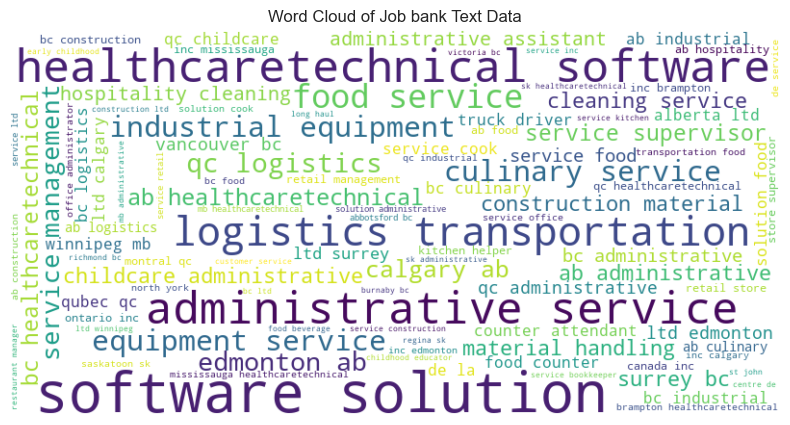

In [1425]:
text = " ".join(i for i in df.job_description_text)

generate_word_cloud(text, 'Word Cloud of Job bank Text Data', bg_color='white')

In [1426]:
df_job_match = df[:1000]

In [1427]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_job_match['job_description_text'])

# Convert TF-IDF matrix to sparse CSR format
tfidf_matrix_sparse = csr_matrix(tfidf_matrix)

# Computing cosine similarity matrix
cosine_sim_sparse = cosine_similarity(tfidf_matrix_sparse, dense_output=False)

print("Similarity Matrix:")
print(cosine_sim_sparse)


Similarity Matrix:
  (0, 994)	0.019516805202974493
  (0, 968)	0.026340666388105224
  (0, 963)	0.021747259293243986
  (0, 958)	0.020734435191544817
  (0, 953)	0.020187586207175746
  (0, 948)	0.031170808982515452
  (0, 944)	0.0156085688464062
  (0, 935)	0.024690667986106377
  (0, 932)	0.02281892272977207
  (0, 916)	0.02010392401287615
  (0, 907)	0.01777225285225847
  (0, 905)	0.020804471403315018
  (0, 898)	0.017716921605685255
  (0, 896)	0.02584275931629072
  (0, 895)	0.02377382639795931
  (0, 884)	0.022272541138136228
  (0, 882)	0.01909518597402726
  (0, 873)	0.018152085551649353
  (0, 852)	0.025098592401635894
  (0, 839)	0.023864976949102827
  (0, 838)	0.01885141411014436
  (0, 835)	0.2914523360577106
  (0, 832)	0.026159615368073475
  (0, 831)	0.024110107383481967
  (0, 830)	0.028376652337741958
  :	:
  (999, 66)	0.11048582983427167
  (999, 55)	0.6247638331997819
  (999, 21)	0.31841481809143934
  (999, 13)	0.27599518775961607
  (999, 11)	0.27059114094089615
  (999, 8)	0.18723636174794

In [1428]:
#searching best matching job
# user_query = "line cook job ontario"
user_query = "Recent high pay software engineer job in Ontario"


# Process user query
processed_query = preprocess_text(user_query)

# Vectorize user query
query_vector = tfidf_vectorizer.transform([processed_query])

# Calculate cosine similarity between user query vector and descriptions
similarity_scores = cosine_similarity(query_vector, tfidf_matrix)

# Rank listings based on similarity scores
ranked_indices = similarity_scores.argsort()[0][::-1]  # Sort indices in descending order of similarity scores

# Return top N results to the user
top_n = 5  # Number of results to return
top_listings = df_job_match.iloc[ranked_indices[:top_n]]



In [1429]:
# Printing  top listings
print("Top Search Results:")
top_listings[['Title','Employer','Location','Salary','Employment Type','Vacancies','Date Posted']]

Top Search Results:


,Title,Employer,Location,Salary,Employment Type,Vacancies,Date Posted
834,"counsellor, job",Canoe Therapy,"Burlington, ON",80.00 HOUR,Full time,1.0,2024-03-12
715,embedded software engineer,Soneil Electronics,"Brampton, ON","70,000 YEAR",Permanent Full Time,1.0,2024-03-26
702,software design engineer,Alpha Infotech Ltd.,"Oakville, ON",53.00 HOUR,Permanent Full Time,1.0,2024-02-28
428,software engineer,SAI INFO TECH,"Mississauga, ON",50.50 HOUR,Permanent Full Time,1.0,2024-03-09
988,"executive director - financial, communications...",Tomato Pay Inc.,"Belleville, ON",72.12 HOUR,Permanent Full Time,1.0,2024-03-27


# 10. Conclusion

In conclusion, the machine learning models LightGBM and Random Forest demonstrated strong performance in predicting salaries based on job characteristics. Deploying these models for real-world applications would be highly beneficial for stakeholders. Additionally, employing NLP techniques to identify the best-matched job for a candidate offers a clear pathway for finding a suitable position based on their profile.

# 11. Future Improvement

Looking forward, we're just getting started on our journey. While our models have given us valuable insights into predicting salaries, there's still a lot we can do to make them better. One big area for improvement is Feature Engineering. By finding new ways to look at the data, we can uncover more details that might help us make better predictions.

We're also thinking about ways to make job searching easier for users. Imagine being able to just upload your resume, and then the system finds the perfect job for you. That's the kind of thing we're aiming for in the future. We want to use Machine Learning to make job finding simpler and more personalized for everyone.


In [1430]:
#*********************************